In [ ]:
import numpy as np

In [ ]:
def koeff(Kas_X, Kas_y, N):
    sum_xy = 0
    for x,y in zip(Kas_X,Kas_y):
        sum_xy = sum_xy + x*y
    sum_x = 0
    for x in Kas_X:
        sum_x = sum_x + x
    sum_y = 0
    for y in Kas_y:
        sum_y = sum_y + y
    sum_kv_x = 0
    for x in Kas_X:
        sum_kv_x = sum_kv_x + x*x

    a = (N*sum_xy - sum_x*sum_y) / (N*sum_kv_x - sum_x**2)
    b = (sum_y - a*sum_x) / N
    print(a, b)
    return [a,b]

In [ ]:
def mnk(Kas_X, Kas_y, N):
    import matplotlib.pyplot as plt

    a, b = koeff(Kas_X, Kas_y, N)

    predict = N
    New_X = [i for i in range(1,predict+1)]
    New_y = list()
    for x in New_X:
        y = a*x + b
        New_y.append(y)

    fig = plt.figure(figsize=((10,3)))
    ax = fig.add_subplot(111)
    plt.grid(linestyle='--')  #стиль сеточки

    plt.xlim(0,predict+1)  #координатная сетка от скольки до скольки
    plt.xticks([i for i in range(predict+1)], size=7)
    plt.yticks(size=7)

    ax.plot(New_X, New_y, color = 'blue', linewidth = 3, label="МНК")  #линия
    ax.scatter(Kas_X, Kas_y, s=7, color = 'purple', label="Реальные данные")  #точки

    ax.set_xlabel('Номер дня')
    ax.set_ylabel('Кол-во найденного \n спама (10^8)')
    ax.legend(loc='upper left')
    plt.show()

In [ ]:
def mnk_pr(Kas_X, Kas_y, N, Test_Kas_X, Test_Kas_y, Test_N):
    import matplotlib.pyplot as plt

    a, b = koeff(Kas_X, Kas_y, N)

    predict = Test_N
    New_X = [i for i in range(1,predict+1)]
    New_y = list()
    for x in New_X:
        y = a*x + b
        New_y.append(y)

    fig = plt.figure(figsize=((16,3)))
    ax = fig.add_subplot(111)
    plt.grid(linestyle='--')  #стиль сеточки

    plt.xlim(0,Test_N+1)  #координатная сетка от скольки до скольки
    plt.xticks([i for i in range(Test_N+1)], size=7)
    plt.yticks(size=7)

    ax.plot(New_X, New_y, color = 'blue', linewidth = 3, label="МНК")  #линия
    ax.scatter(Kas_X, Kas_y, s=7, color = 'purple', label="Реальные данные")  #точки

    ax.scatter(Test_Kas_X, Test_Kas_y, s=7, color = 'orange', label="Реальные проверочные данные")  #точки

    ax.set_xlabel('Номер дня')
    ax.set_ylabel('Кол-во найденного \n спама (10^8)')
    ax.legend(loc='upper left')
    plt.show()

In [ ]:
def mnk_diap(Kas_X, Kas_y, N, Test_Kas_X, Test_Kas_y, Test_N):
    import matplotlib.pyplot as plt

    a, b = koeff(Kas_X, Kas_y, N)
    ymin=0 #min(Kas_y) #возможно и другое

    predict = Test_N
    New_X = [i for i in range(1,predict+1)]
    New_y = list()
    Maxy=list()
    for x in New_X:
        y = a*x + b
        New_y.append(y)
        ymax=2*y-ymin
        Maxy.append(ymax)

    fig = plt.figure(figsize=((16,3)))
    ax = fig.add_subplot(111)
    plt.grid(linestyle='--')  #стиль сеточки

    plt.xlim(0,Test_N+1)  #координатная сетка от скольки до скольки
    plt.xticks([i for i in range(Test_N+1)], size=7)
    plt.yticks(size=7)

    ax.plot(New_X, New_y, color = 'blue', linewidth = 3, label="МНК")  #линия
    ax.scatter(Kas_X, Kas_y, s=7, color = 'purple', label="Реальные данные")  #точки
    ax.plot(New_X, Maxy, color = 'red', linewidth = 2, label="Граница максимума")  #линия

    ax.scatter(Test_Kas_X, Test_Kas_y, s=7, color = 'orange', label="Реальные проверочные данные")  #точки

    ax.set_xlabel('Номер дня')
    ax.set_ylabel('Кол-во найденного \n спама (10^8)')
    ax.legend(loc='upper left')
    plt.show()

In [ ]:
def mnk_diap_predict(Kas_X, Kas_y, N, Test_Kas_X, Test_Kas_y, Test_N, plus):
    import pandas as pd
    import matplotlib.pyplot as plt

    a, b = koeff(Kas_X, Kas_y, N)
    ymin=0 #min(Kas_y) #возможно и другое

    predict = Test_N
    New_X = [i for i in range(1,predict+1+plus)] #bu
    New_y = list() #bu
    Maxy=list() #bu
    for x in New_X:
        y = a*x + b
        New_y.append(y)
        ymax=2*y-ymin
        Maxy.append(ymax)
    data = {'mnk' : New_y,
        'max' : Maxy}
    frame = pd.DataFrame(data)
    print(frame)
    frame.to_csv('my_data.csv')

    fig = plt.figure(figsize=((16,3)))
    ax = fig.add_subplot(111)
    plt.grid(linestyle='--')  #стиль сеточки

    plt.xlim(0,Test_N+1+plus)  #координатная сетка от скольки до скольки  #bu
    plt.xticks([i for i in range(Test_N+1+plus)], size=7)  #bu
    plt.yticks(size=7)

    ax.plot(New_X, New_y, color = 'blue', linewidth = 3, label="МНК")  #линия
    ax.scatter(Kas_X, Kas_y, s=7, color = 'purple', label="Реальные данные")  #точки
    ax.plot(New_X, Maxy, color = 'red', linewidth = 2, label="Граница максимума")  #линия

    ax.scatter(Test_Kas_X, Test_Kas_y, s=7, color = 'orange', label="Реальные проверочные данные")  #точки

    ax.set_xlabel('Номер дня')
    ax.set_ylabel('Кол-во найденного \n спама (10^8)')
    ax.legend(loc='upper left')
    plt.show()

In [ ]:
def mnk_diap_predict_withdots25(Kas_X, Kas_y, N, Test_Kas_X, Test_Kas_y, Test_N, plus):
    import pandas as pd
    import matplotlib.pyplot as plt

    green_x = [i for i in range(46,52)]
    green_y = [54090000, 56708500, 68155500, 327072500, 228419500, 121402000] #, 0,0,0,0
    a, b = koeff(Kas_X, Kas_y, N)
    ymin=0 #min(Kas_y) #возможно и другое

    predict = Test_N
    New_X = [i for i in range(1,predict+1+plus)] #bu
    New_y = list() #bu
    Maxy=list() #bu
    for x in New_X:
        y = a*x + b
        New_y.append(y)
        ymax=2*y-ymin
        Maxy.append(ymax)
    data = {'mnk' : New_y,
        'max' : Maxy}
    frame = pd.DataFrame(data)
    print(frame)
    frame.to_csv('my_data.csv')

    fig = plt.figure(figsize=((16,3)))
    ax = fig.add_subplot(111)
    plt.grid(linestyle='--')  #стиль сеточки

    plt.xlim(0,Test_N+1+plus)  #координатная сетка от скольки до скольки  #bu
    plt.xticks([i for i in range(Test_N+1+plus)], size=7)  #bu
    plt.yticks(size=7)

    ax.scatter(green_x, green_y, s=7, color = 'green', label="Реальные тестовые данные")  #точки

    ax.plot(New_X, New_y, color = 'blue', linewidth = 3, label="МНК")  #линия
    ax.scatter(Kas_X, Kas_y, s=7, color = 'purple', label="Реальные данные")  #точки
    ax.plot(New_X, Maxy, color = 'red', linewidth = 2, label="Граница максимума")  #линия

    ax.scatter(Test_Kas_X, Test_Kas_y, s=7, color = 'orange', label="Реальные проверочные данные")  #точки

    ax.set_xlabel('Номер дня')
    ax.set_ylabel('Кол-во найденного \n спама (10^8)')
    ax.legend(loc='upper left')
    plt.show()

In [ ]:
def main(Our_N):
    plus = 6
    b_y = [156162500, 181796500, 52675000, 37518500, 292474500, 251522500, 220245500, 220069500,    # 23 марта .. 6 мая
            142005500, 96354500, 71430500, 306180000, 281920000, 227146500, 271404500, 234216500,
            75514500, 415880000, 249214500, 330876000, 336106500, 250028500, 188072500, 49561500,
            42216500, 450893500, 341788000, 297701000, 291135500, 204772000,
            73038000, 70380500, 445285500, 388337500, 208961500, 239127500, 249572000, 76326000, 82122500,
            80343500, 377141000, 293909500, 201049500, 105610000, 62966000]
    b_y_N = len(b_y)
    N = Our_N
    Kas_y = b_y[0:N]
    Kas_X = [i for i in range(1,N+1)]
    Test_Kas_y = b_y[N:b_y_N]
    Test_N = len(Test_Kas_y)+len(Kas_y)+1
    Test_Kas_X = [i for i in range(N+1,Test_N)]

    mnk(Kas_X, Kas_y, N)
    mnk_pr(Kas_X, Kas_y, N, Test_Kas_X, Test_Kas_y, Test_N)
    mnk_diap(Kas_X, Kas_y, N, Test_Kas_X, Test_Kas_y, Test_N)
    mnk_diap_predict(Kas_X, Kas_y, N, Test_Kas_X, Test_Kas_y, Test_N, plus)
    mnk_diap_predict_withdots25(Kas_X, Kas_y, N, Test_Kas_X, Test_Kas_y, Test_N, plus)

2285047.3076923075 169518105.0


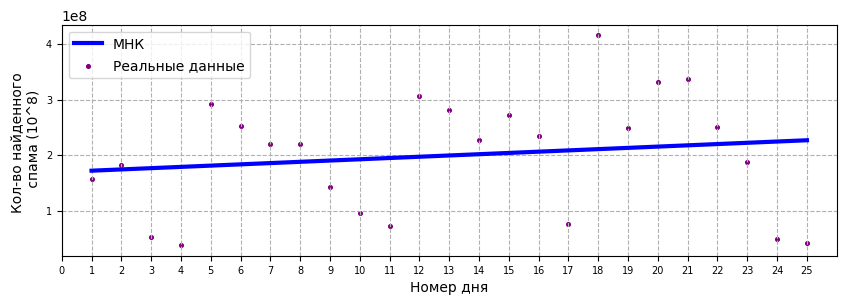

2285047.3076923075 169518105.0


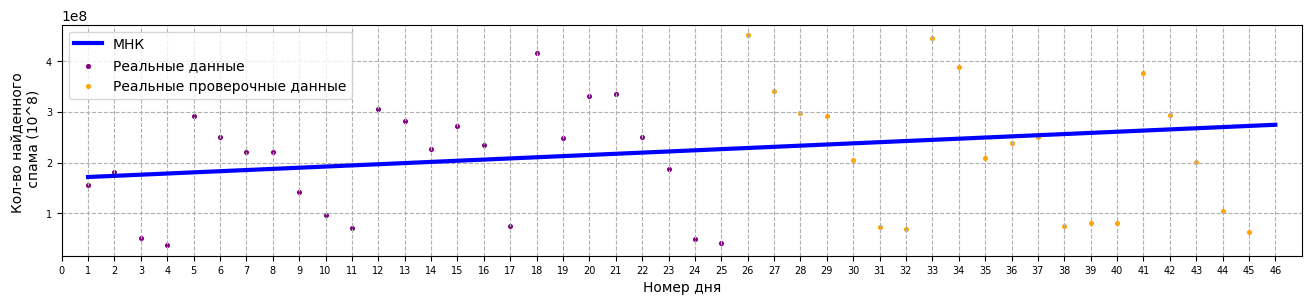

2285047.3076923075 169518105.0


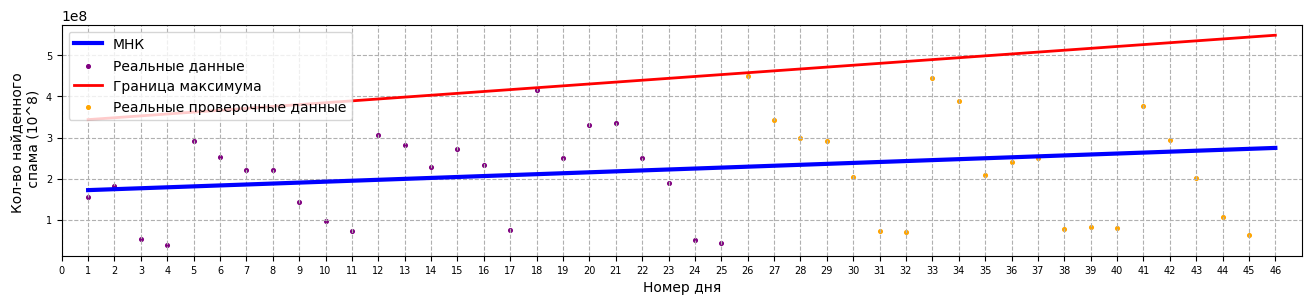

2285047.3076923075 169518105.0
             mnk           max
0   1.718032e+08  3.436063e+08
1   1.740882e+08  3.481764e+08
2   1.763732e+08  3.527465e+08
3   1.786583e+08  3.573166e+08
4   1.809433e+08  3.618867e+08
5   1.832284e+08  3.664568e+08
6   1.855134e+08  3.710269e+08
7   1.877985e+08  3.755970e+08
8   1.900835e+08  3.801671e+08
9   1.923686e+08  3.847372e+08
10  1.946536e+08  3.893073e+08
11  1.969387e+08  3.938773e+08
12  1.992237e+08  3.984474e+08
13  2.015088e+08  4.030175e+08
14  2.037938e+08  4.075876e+08
15  2.060789e+08  4.121577e+08
16  2.083639e+08  4.167278e+08
17  2.106490e+08  4.212979e+08
18  2.129340e+08  4.258680e+08
19  2.152191e+08  4.304381e+08
20  2.175041e+08  4.350082e+08
21  2.197891e+08  4.395783e+08
22  2.220742e+08  4.441484e+08
23  2.243592e+08  4.487185e+08
24  2.266443e+08  4.532886e+08
25  2.289293e+08  4.578587e+08
26  2.312144e+08  4.624288e+08
27  2.334994e+08  4.669989e+08
28  2.357845e+08  4.715690e+08
29  2.380695e+08  4.761390e+08
30  2.40

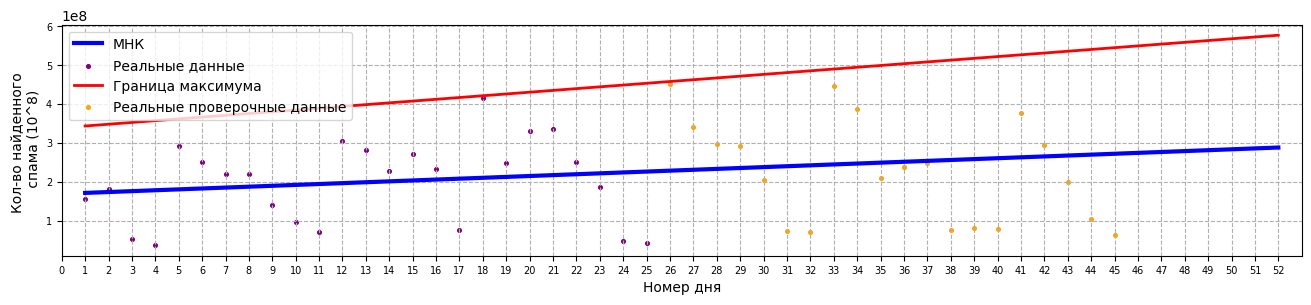

2285047.3076923075 169518105.0
             mnk           max
0   1.718032e+08  3.436063e+08
1   1.740882e+08  3.481764e+08
2   1.763732e+08  3.527465e+08
3   1.786583e+08  3.573166e+08
4   1.809433e+08  3.618867e+08
5   1.832284e+08  3.664568e+08
6   1.855134e+08  3.710269e+08
7   1.877985e+08  3.755970e+08
8   1.900835e+08  3.801671e+08
9   1.923686e+08  3.847372e+08
10  1.946536e+08  3.893073e+08
11  1.969387e+08  3.938773e+08
12  1.992237e+08  3.984474e+08
13  2.015088e+08  4.030175e+08
14  2.037938e+08  4.075876e+08
15  2.060789e+08  4.121577e+08
16  2.083639e+08  4.167278e+08
17  2.106490e+08  4.212979e+08
18  2.129340e+08  4.258680e+08
19  2.152191e+08  4.304381e+08
20  2.175041e+08  4.350082e+08
21  2.197891e+08  4.395783e+08
22  2.220742e+08  4.441484e+08
23  2.243592e+08  4.487185e+08
24  2.266443e+08  4.532886e+08
25  2.289293e+08  4.578587e+08
26  2.312144e+08  4.624288e+08
27  2.334994e+08  4.669989e+08
28  2.357845e+08  4.715690e+08
29  2.380695e+08  4.761390e+08
30  2.40

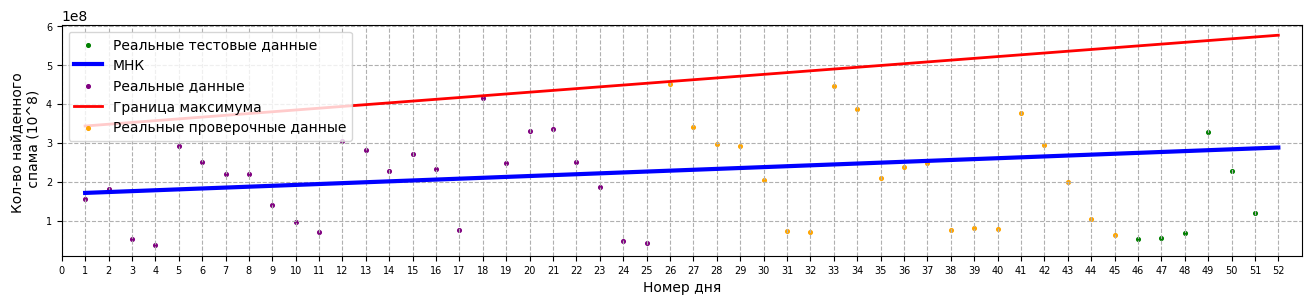

In [ ]:
main(25)

# Примеры выполнения при различном количестве (10,12,17,24,25,32,39,40) дней, на основе которых была построена прямая
# **Скорее всего при 25 днях лучший результат...**

3196318.1818181816 147502700.0


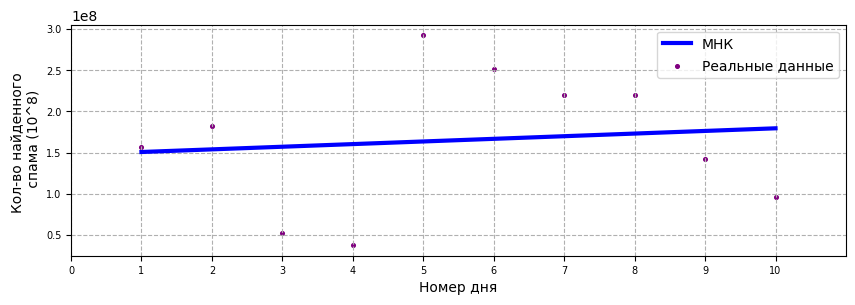

3196318.1818181816 147502700.0


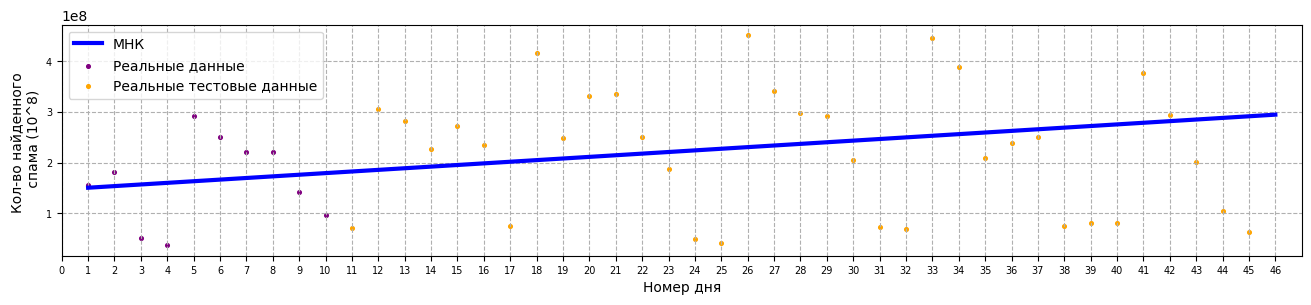

3196318.1818181816 147502700.0


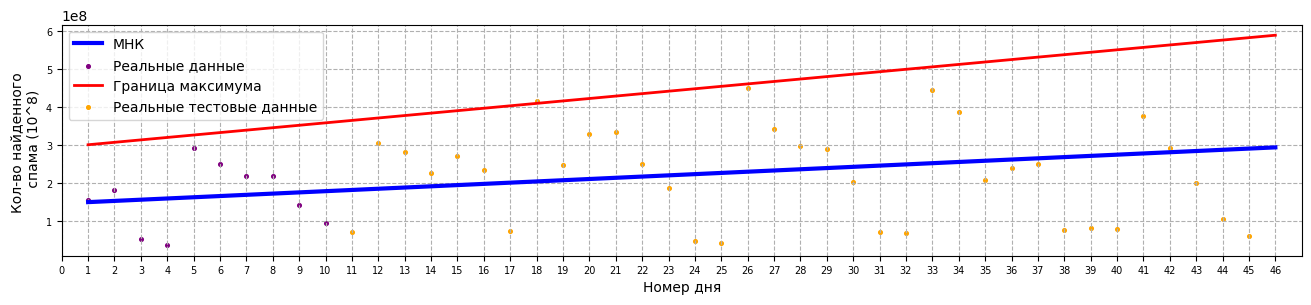

In [ ]:
main(10)

4323769.230769231 140931750.0


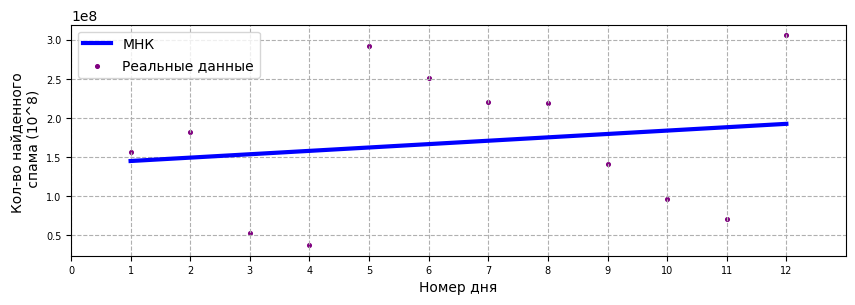

4323769.230769231 140931750.0


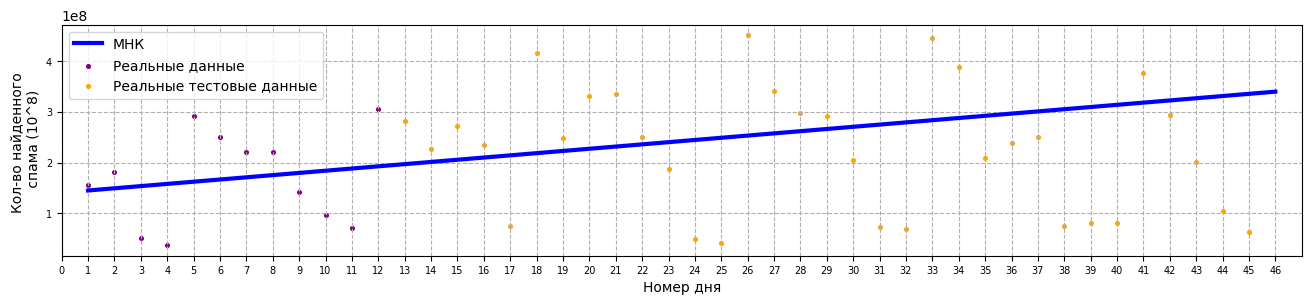

4323769.230769231 140931750.0


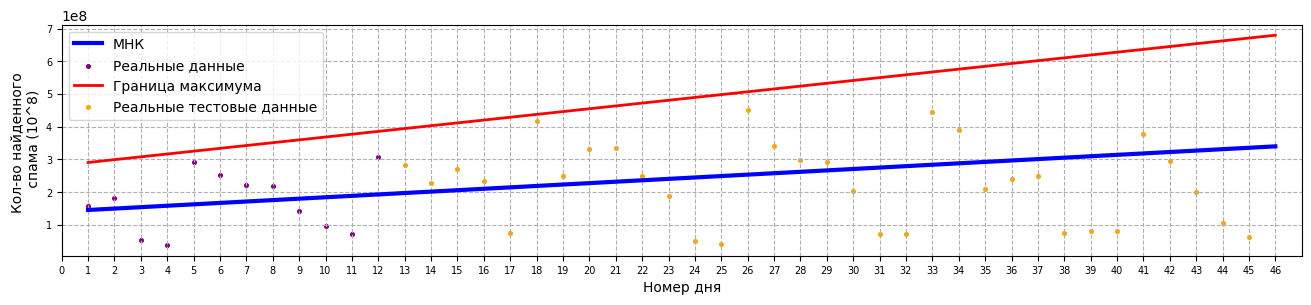

In [ ]:
main(12)

4124221.81372549 146331238.97058824


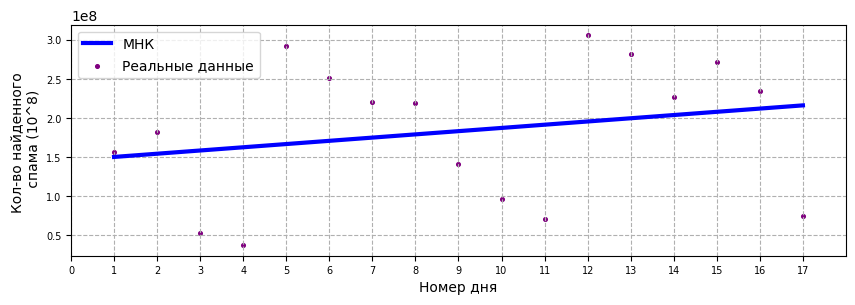

4124221.81372549 146331238.97058824


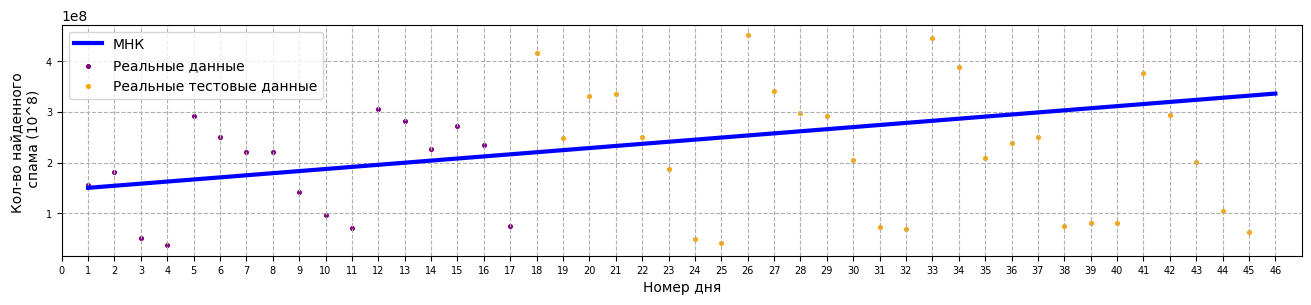

4124221.81372549 146331238.97058824


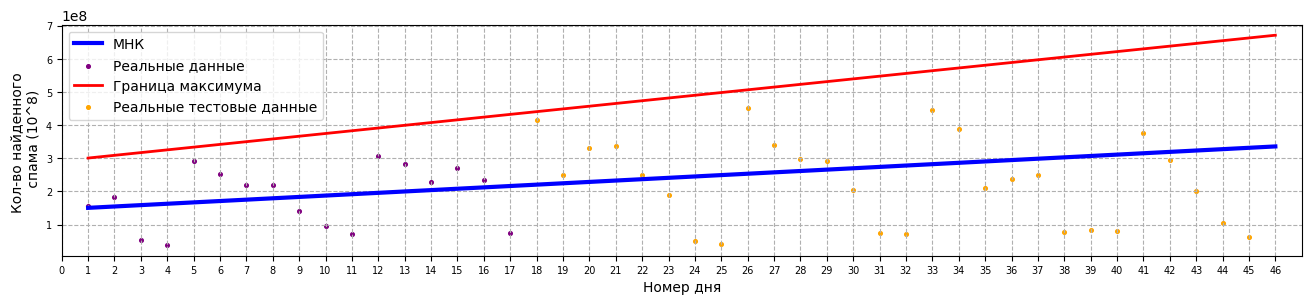

In [ ]:
main(17)

4289697.173913044 152144472.82608697


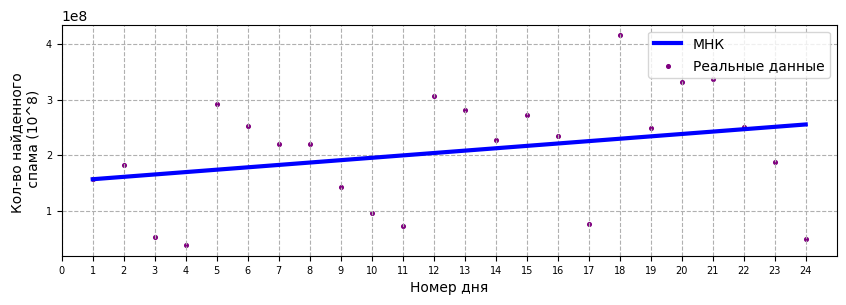

4289697.173913044 152144472.82608697


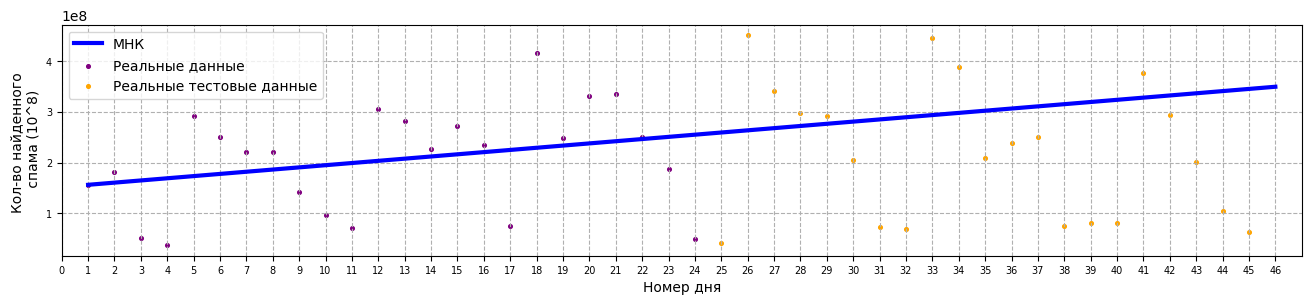

4289697.173913044 152144472.82608697


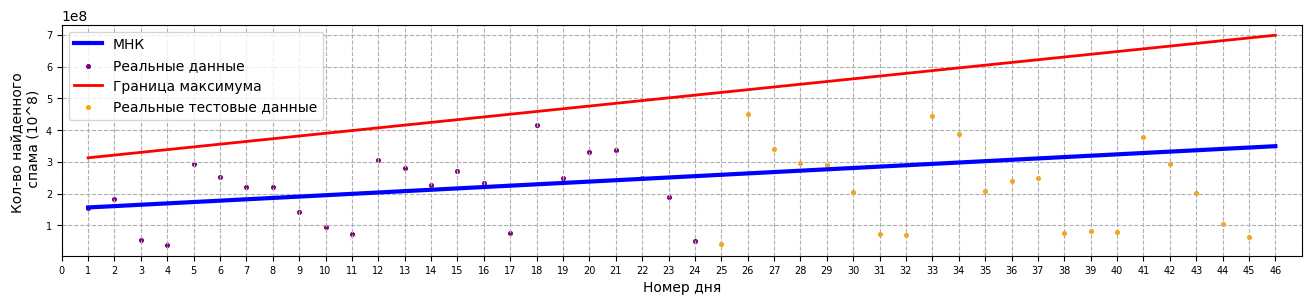

In [ ]:
main(24)

2285047.3076923075 169518105.0


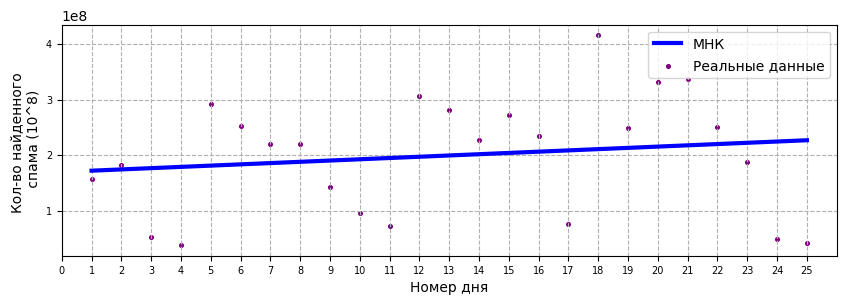

2285047.3076923075 169518105.0


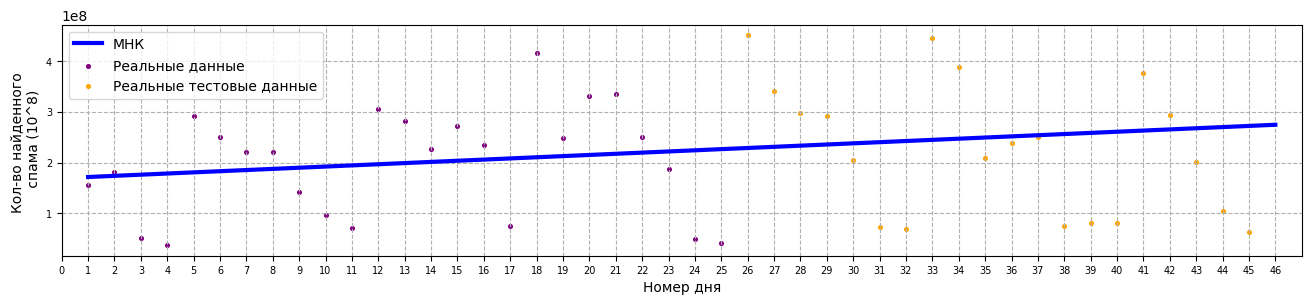

2285047.3076923075 169518105.0


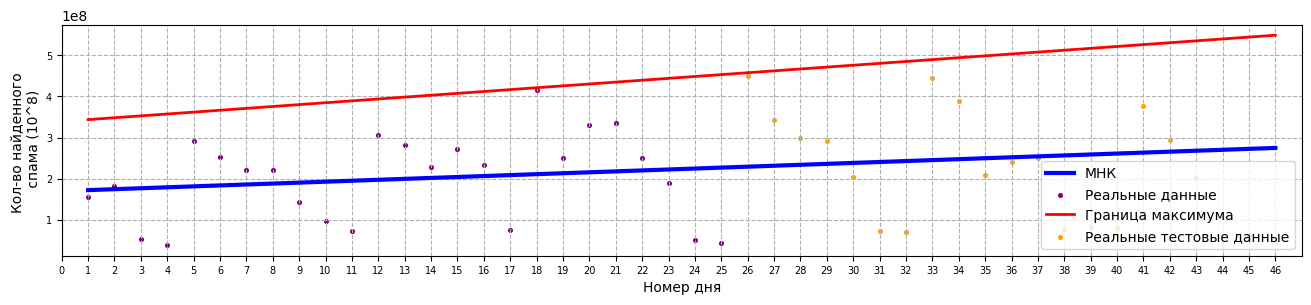

In [ ]:
main(25)

1975027.2177419355 177108972.78225806


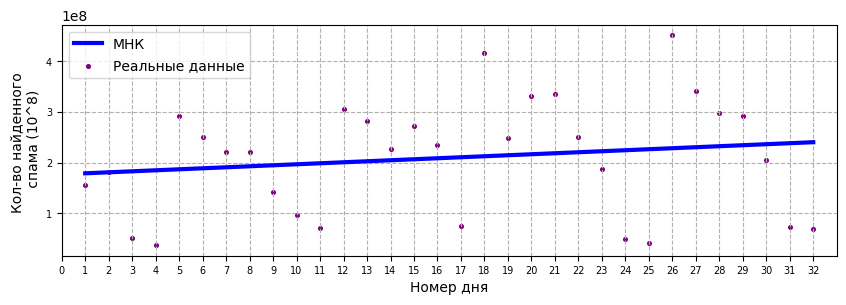

1975027.2177419355 177108972.78225806


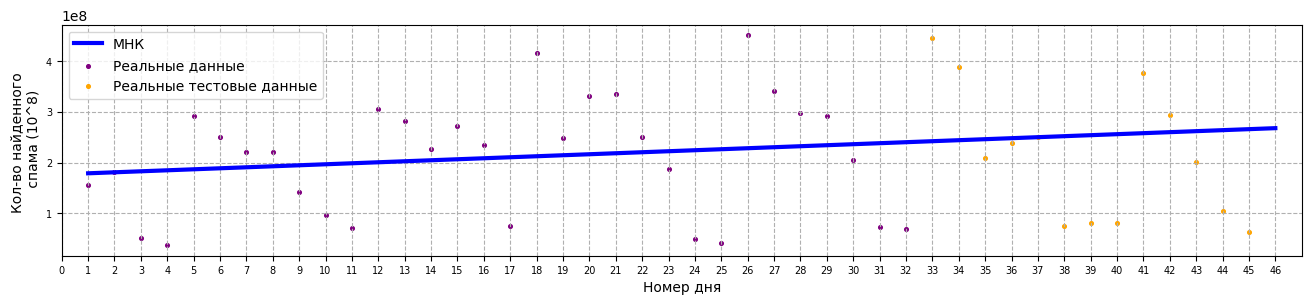

1975027.2177419355 177108972.78225806


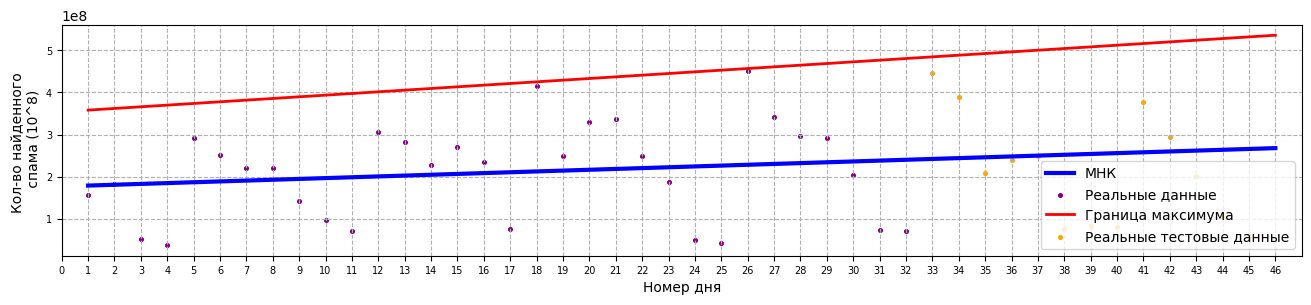

In [ ]:
main(32)

1470574.3927125507 185973999.32523617


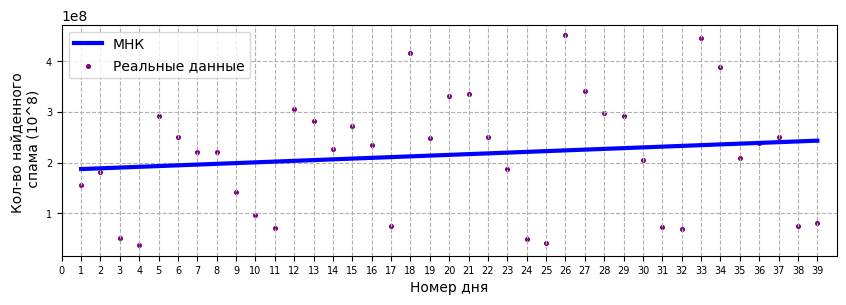

1470574.3927125507 185973999.32523617


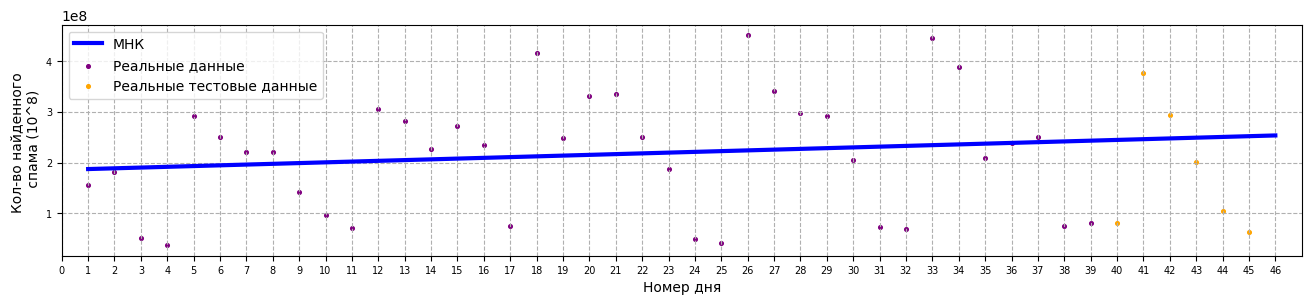

1470574.3927125507 185973999.32523617


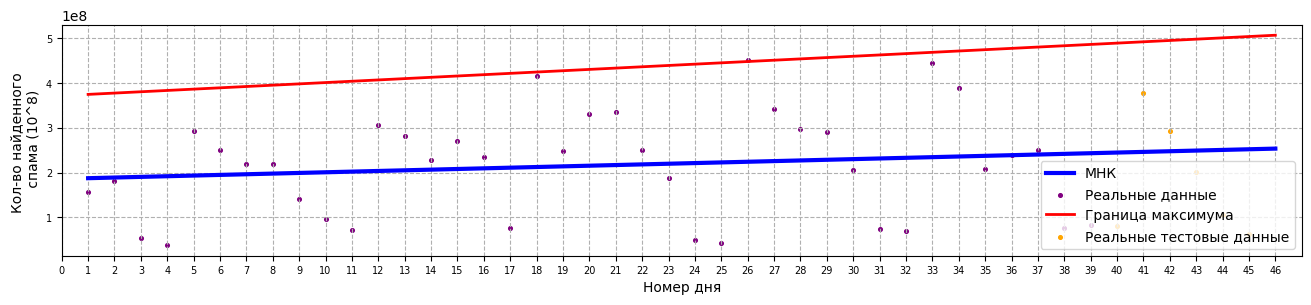

In [ ]:
main(39)

868915.3377110694 194196673.07692307


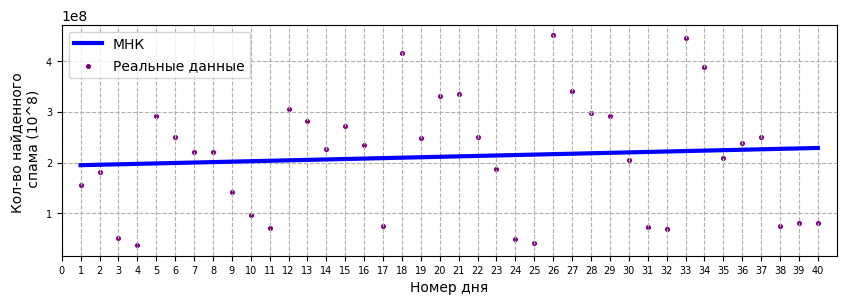

868915.3377110694 194196673.07692307


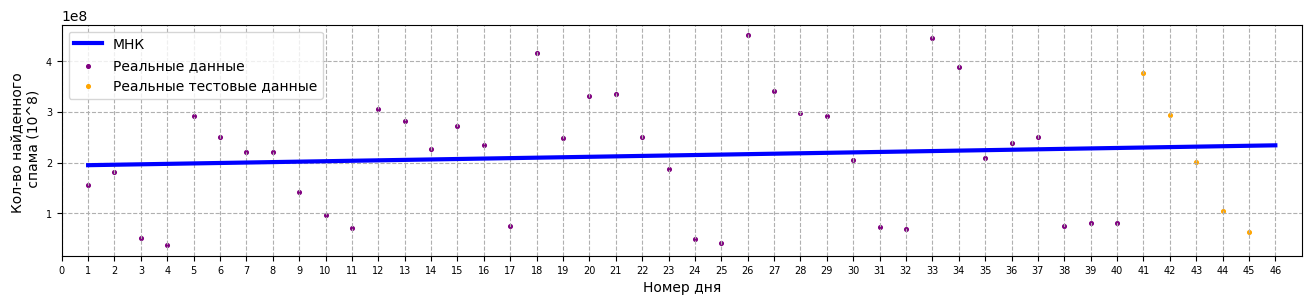

868915.3377110694 194196673.07692307


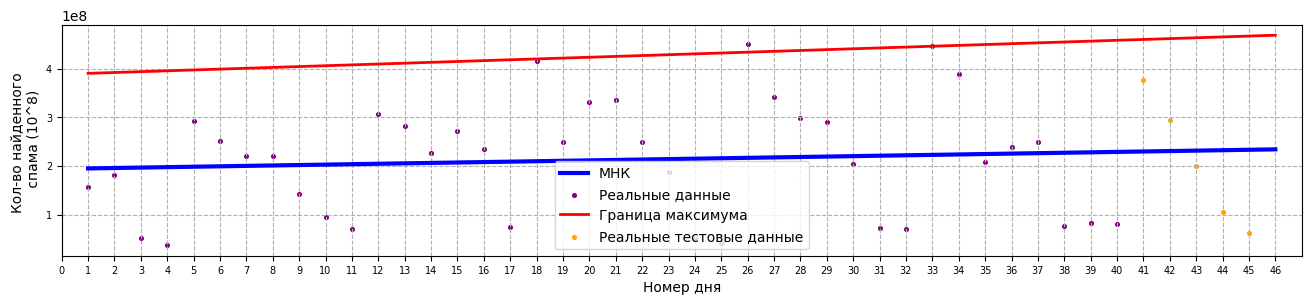

In [ ]:
main(40)

# Примеры выполнения при постоянном увеличении на 1 дней, на основе которых была построена прямая (весго дней 45)

25634000.0 130528500.0


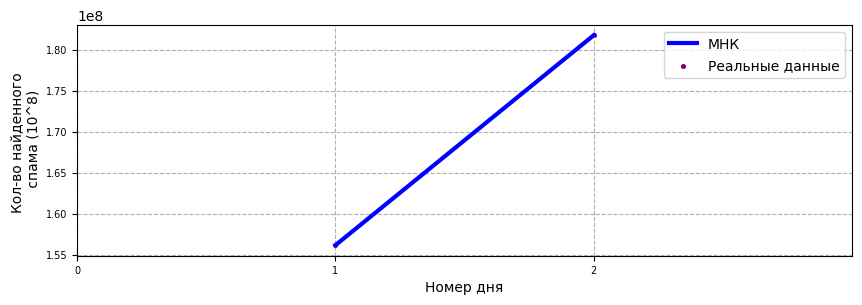

25634000.0 130528500.0


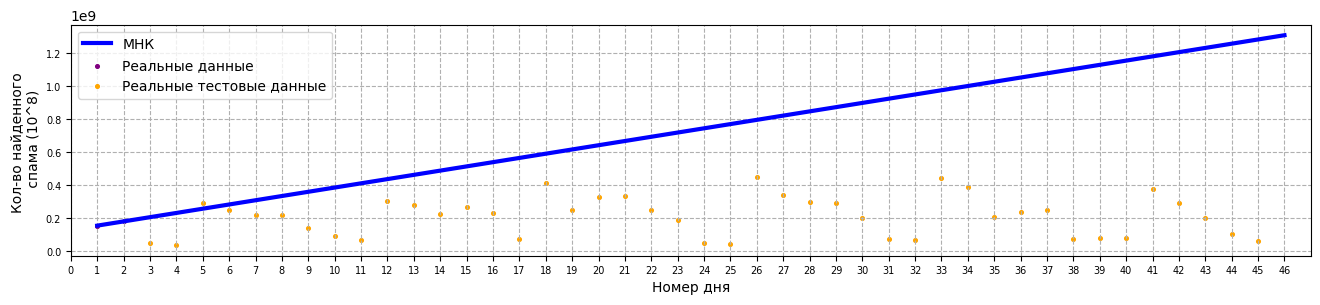

25634000.0 130528500.0


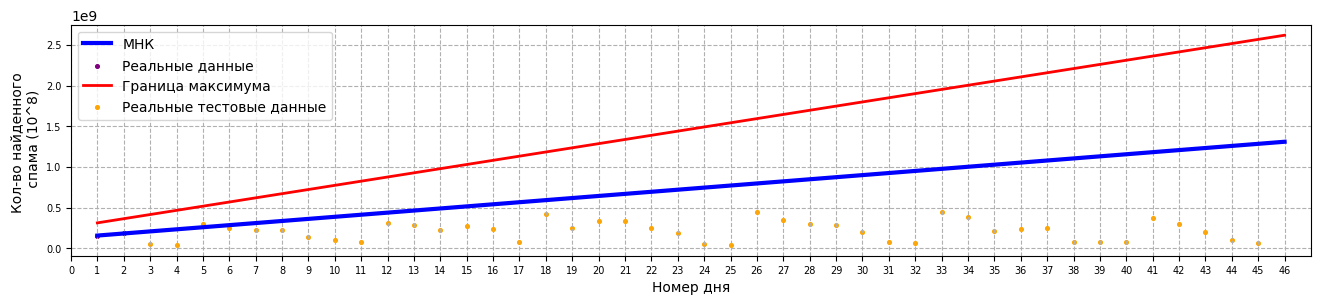

-51743750.0 233698833.33333334


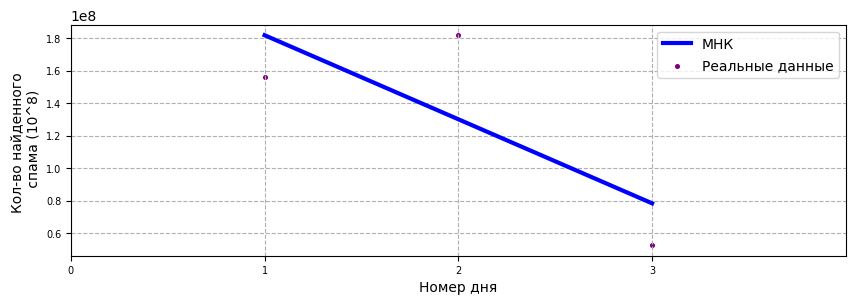

-51743750.0 233698833.33333334


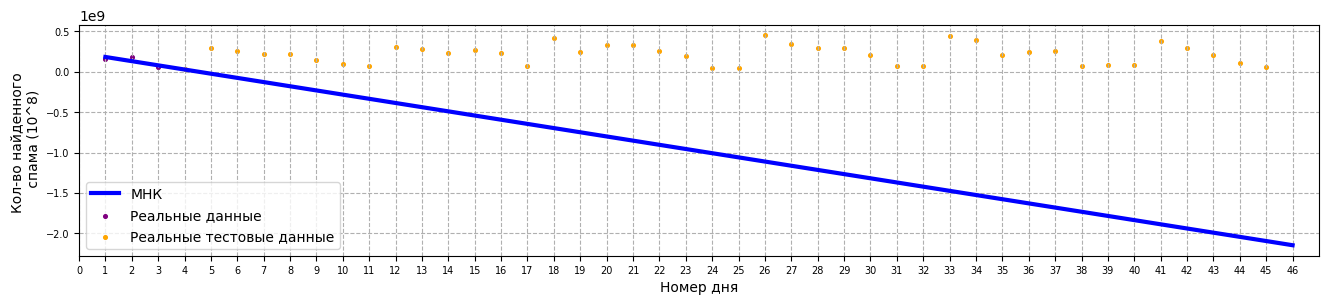

-51743750.0 233698833.33333334


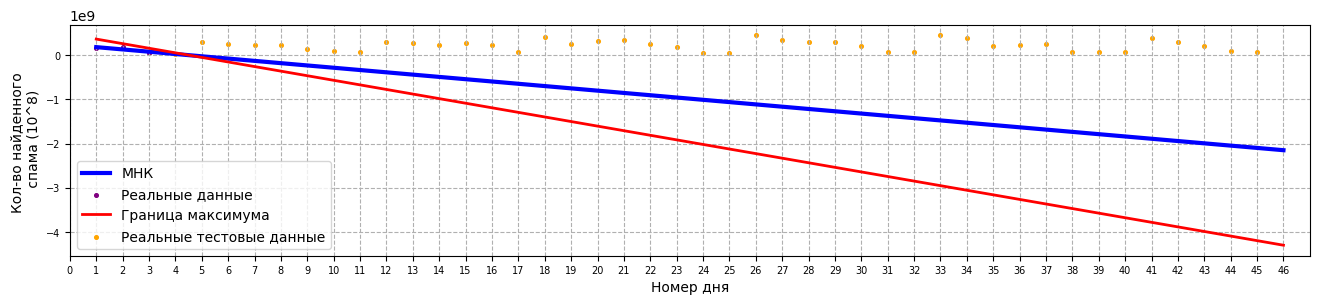

-48505350.0 228301500.0


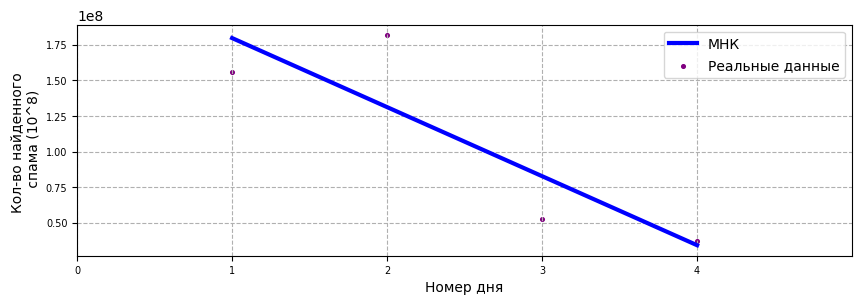

-48505350.0 228301500.0


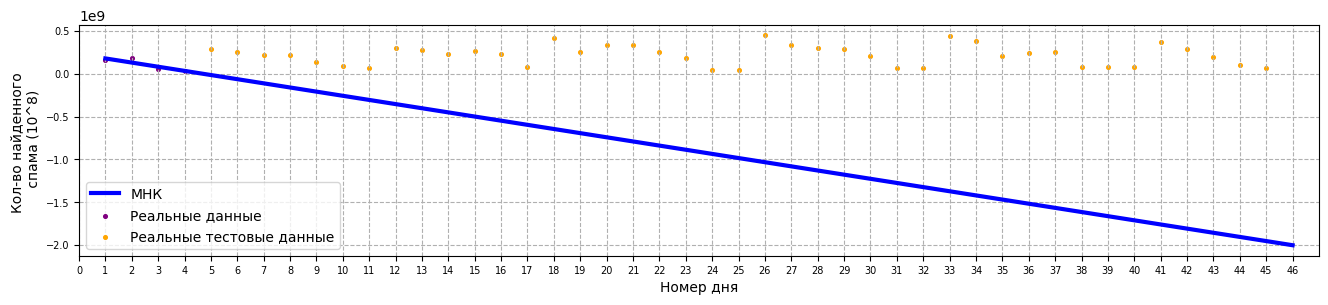

-48505350.0 228301500.0


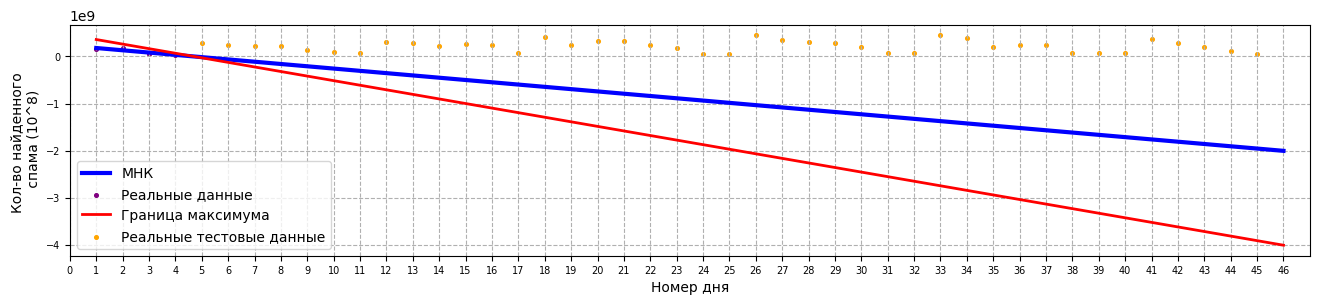

12834600.0 105621600.0


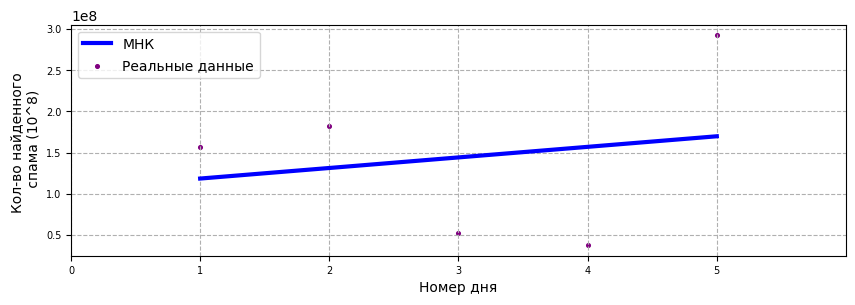

12834600.0 105621600.0


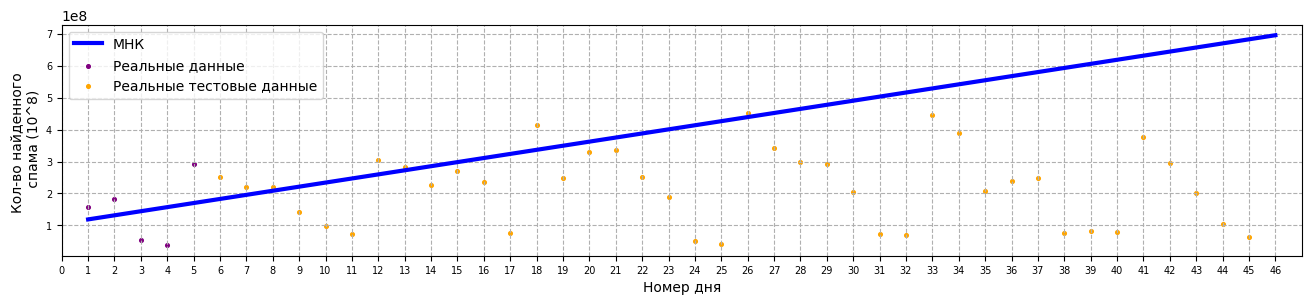

12834600.0 105621600.0


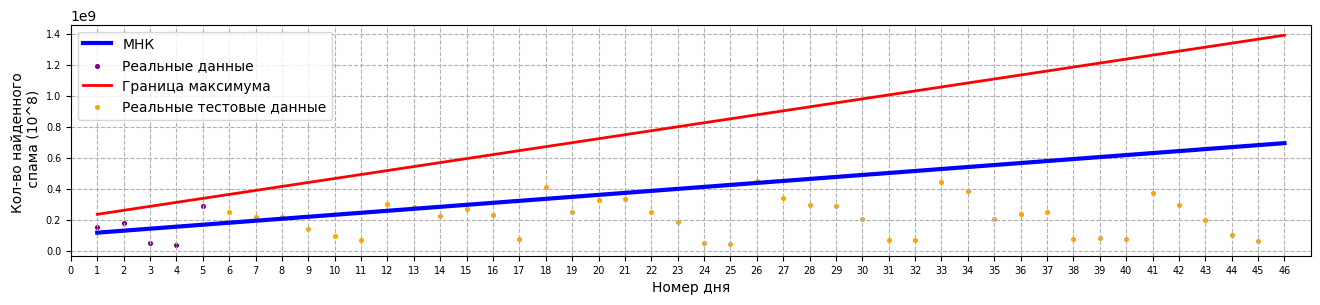

22676500.0 82657166.66666667


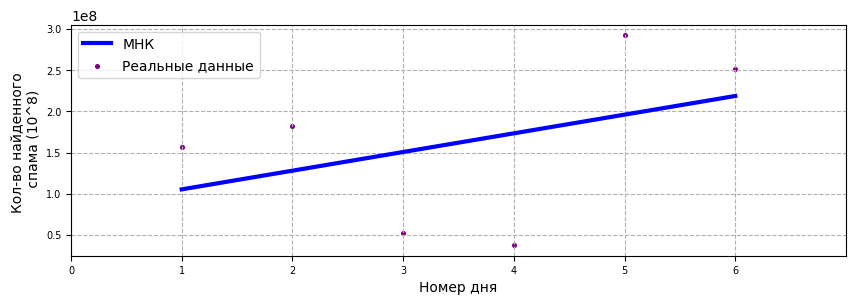

22676500.0 82657166.66666667


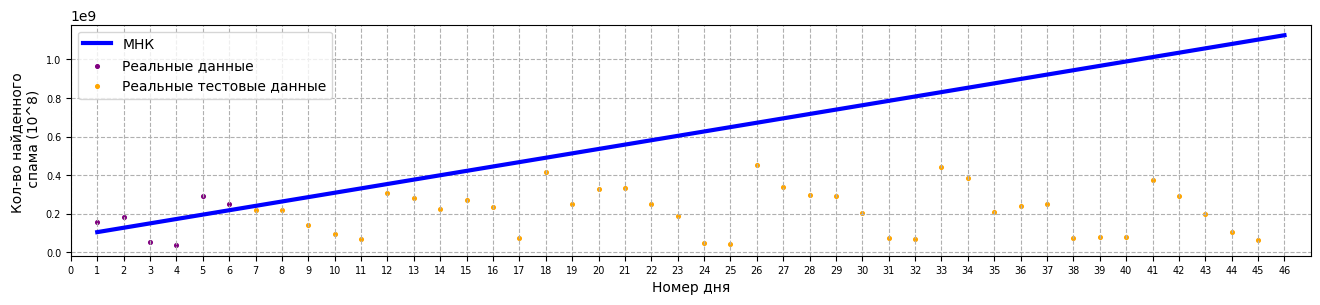

22676500.0 82657166.66666667


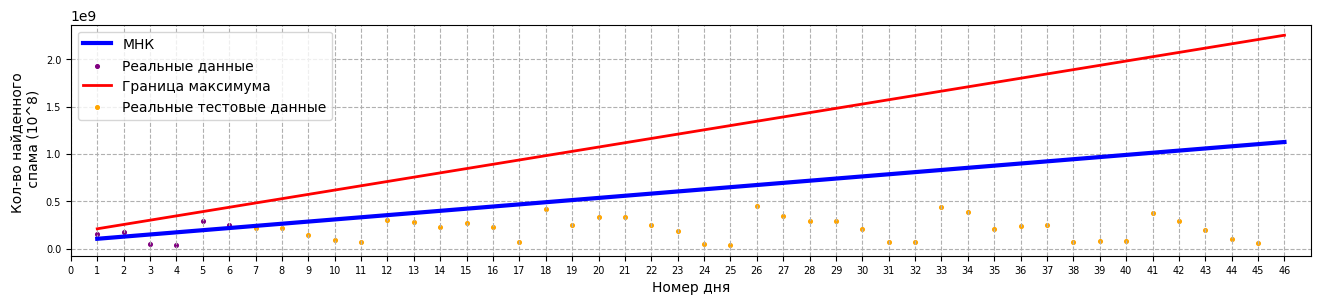

20410732.14285714 88699214.28571428


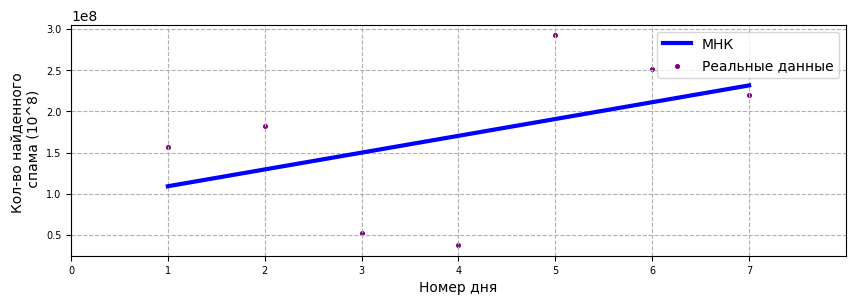

20410732.14285714 88699214.28571428


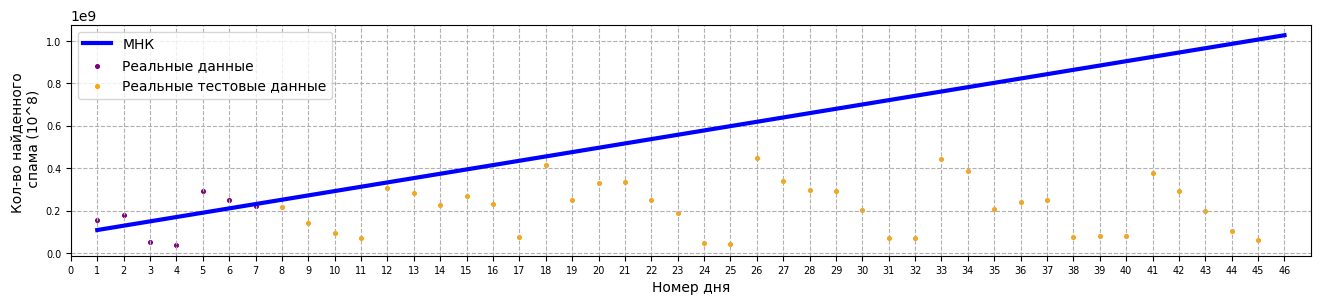

20410732.14285714 88699214.28571428


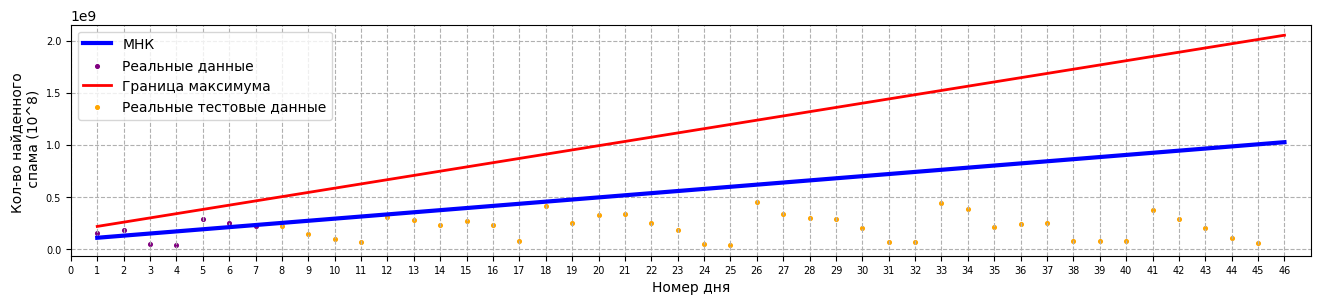

17751101.19047619 96678107.14285715


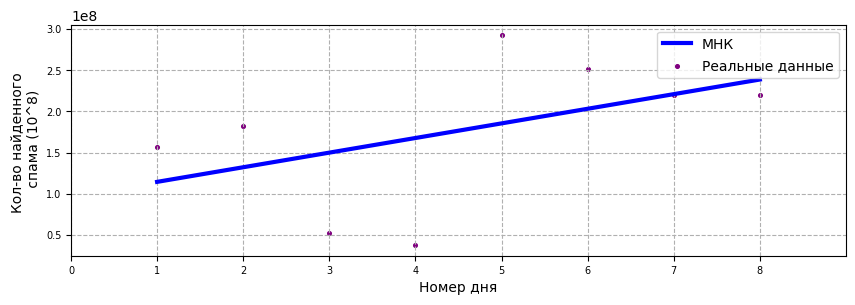

17751101.19047619 96678107.14285715


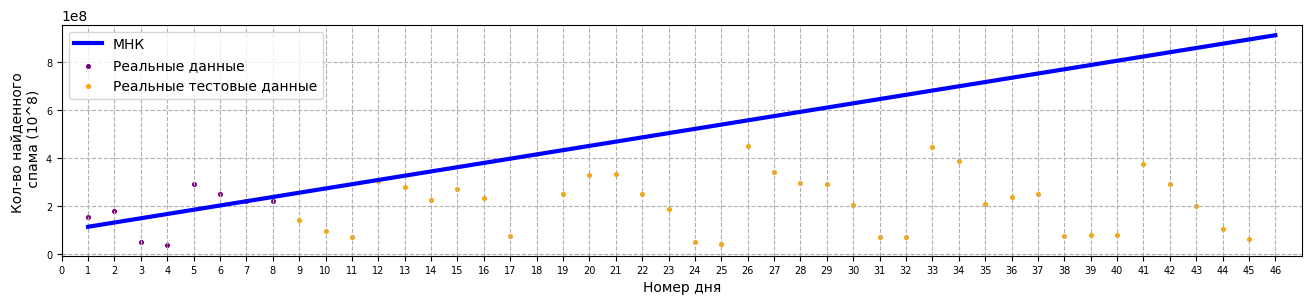

17751101.19047619 96678107.14285715


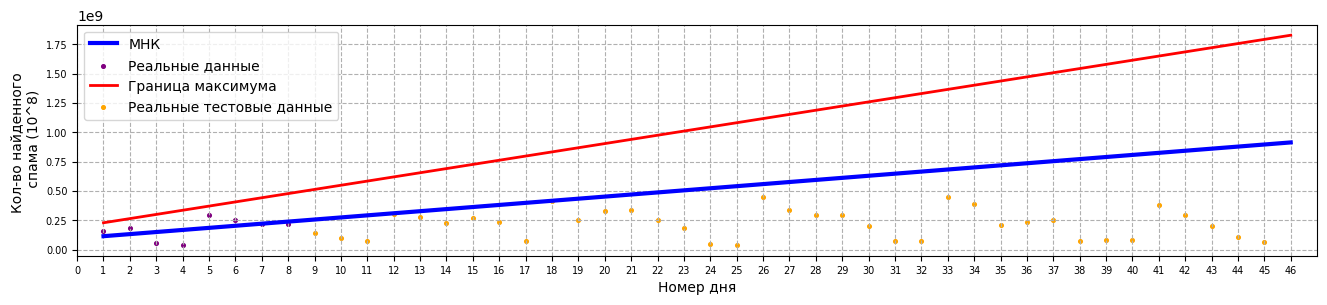

10122266.666666666 122107555.55555555


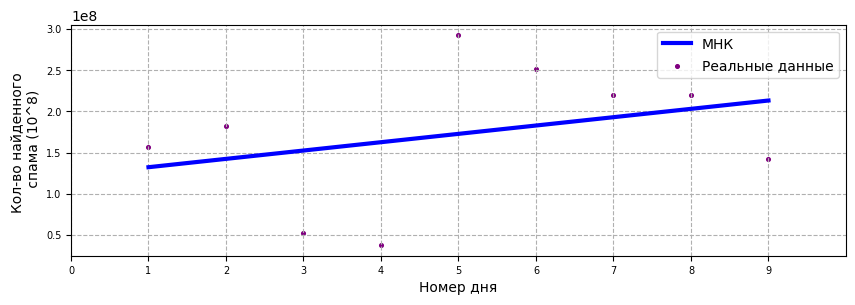

10122266.666666666 122107555.55555555


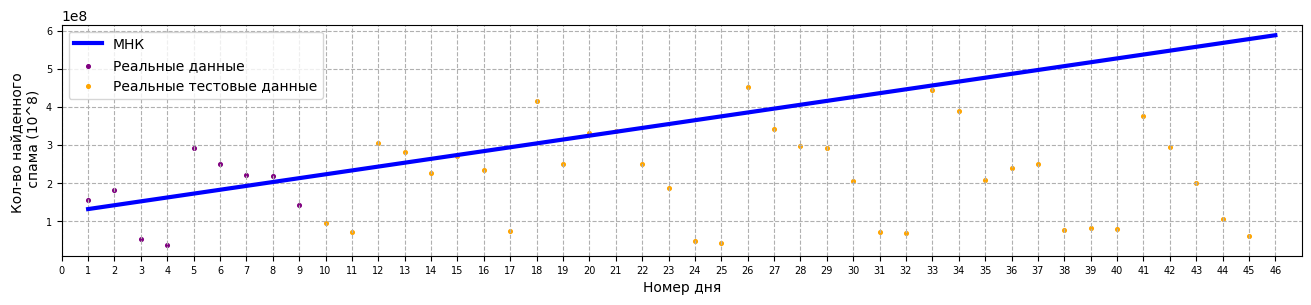

10122266.666666666 122107555.55555555


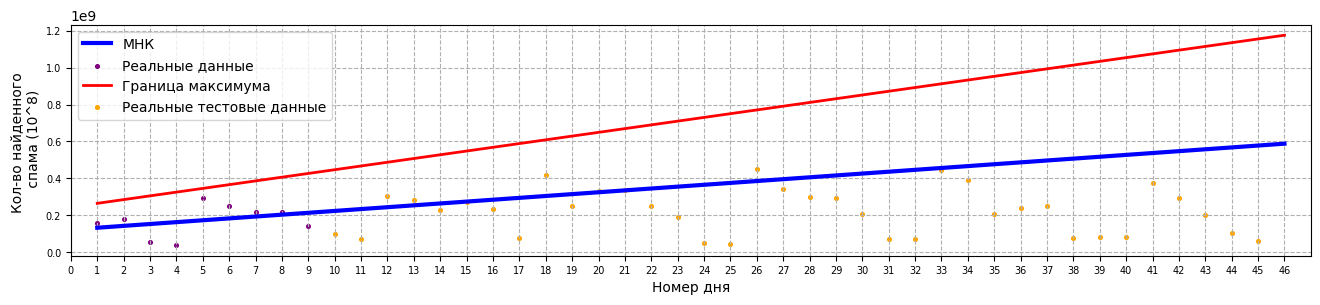

3196318.1818181816 147502700.0


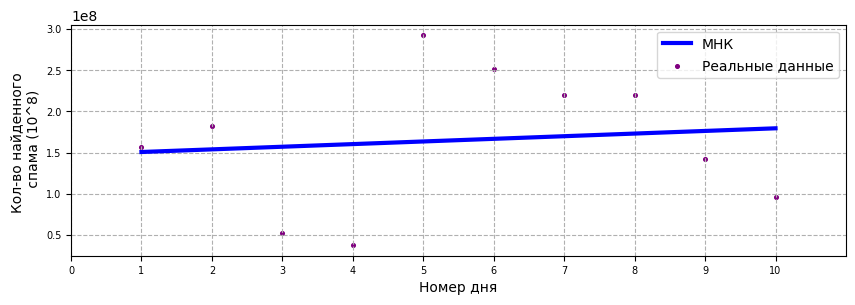

3196318.1818181816 147502700.0


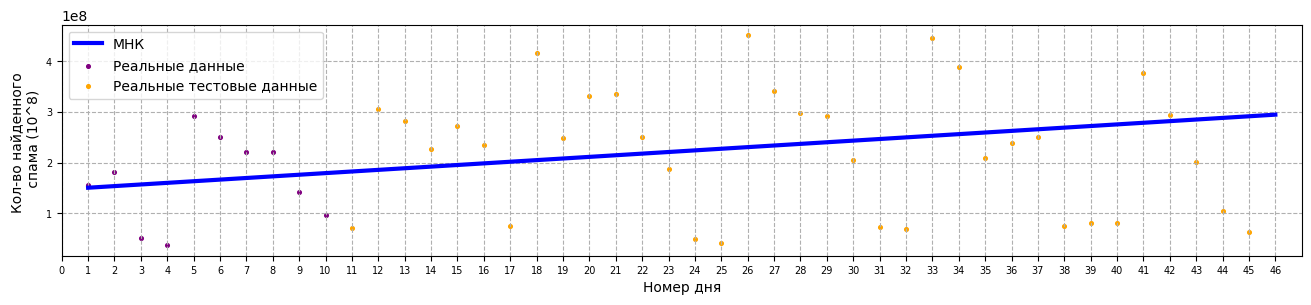

3196318.1818181816 147502700.0


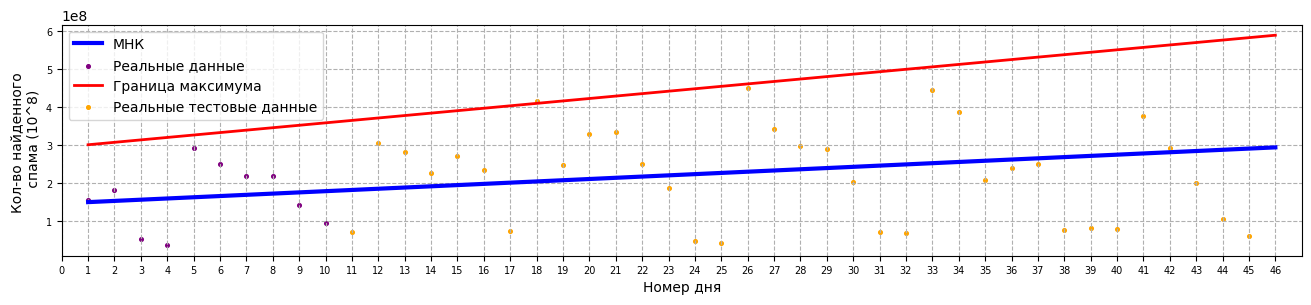

-1859668.1818181819 167726645.45454547


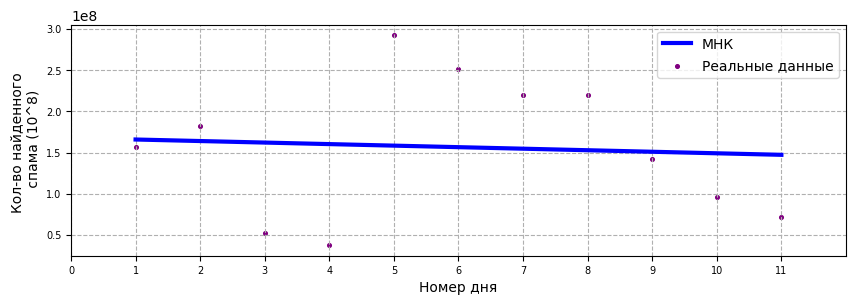

-1859668.1818181819 167726645.45454547


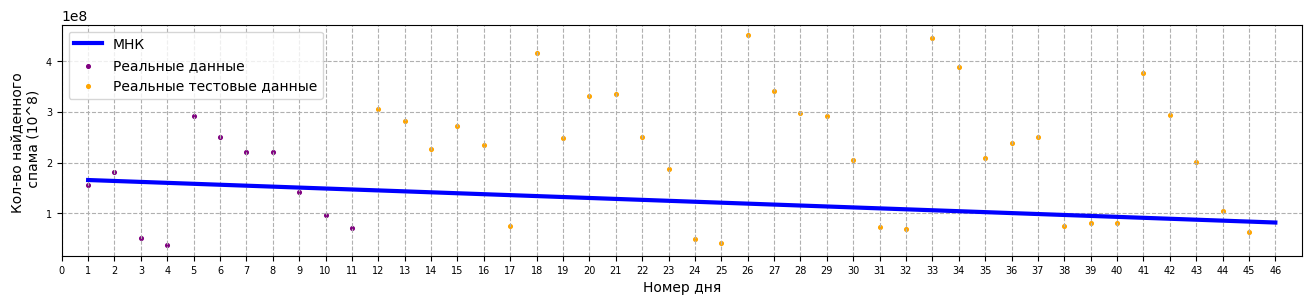

-1859668.1818181819 167726645.45454547


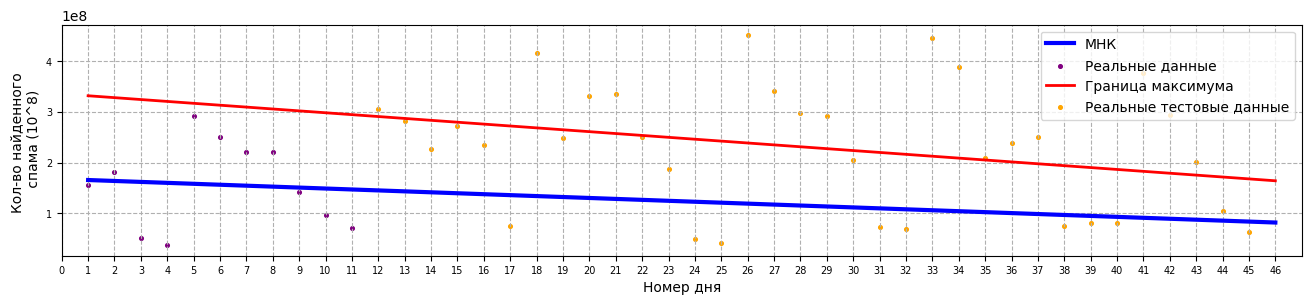

4323769.230769231 140931750.0


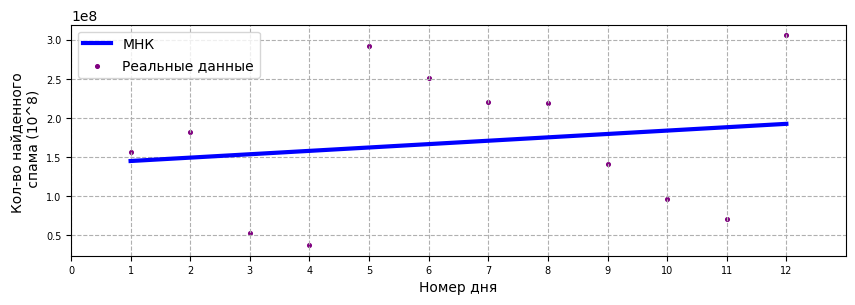

4323769.230769231 140931750.0


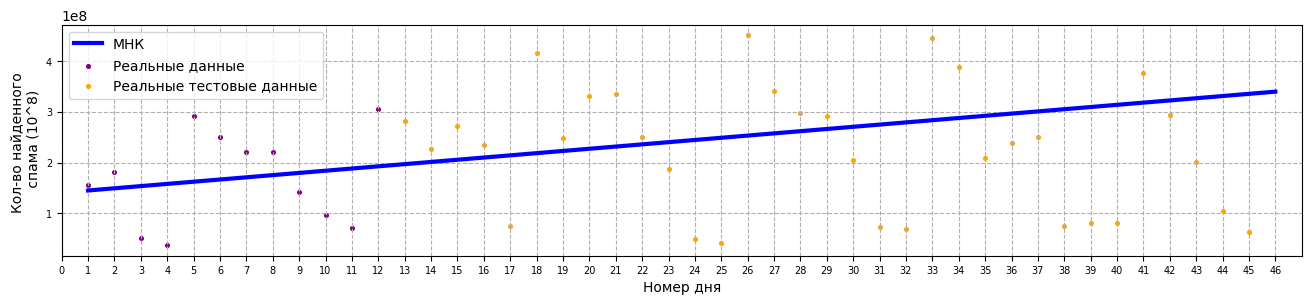

4323769.230769231 140931750.0


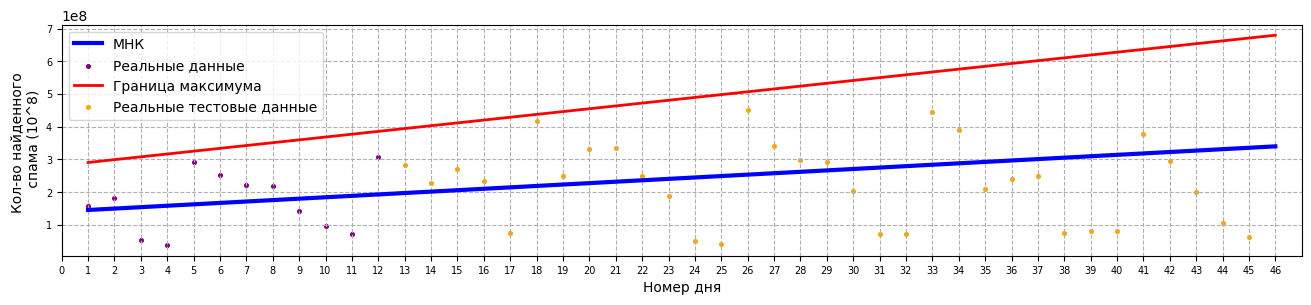

7118689.560439561 127888788.46153846


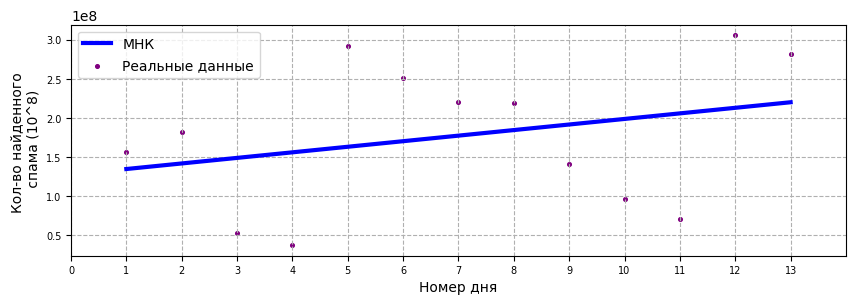

7118689.560439561 127888788.46153846


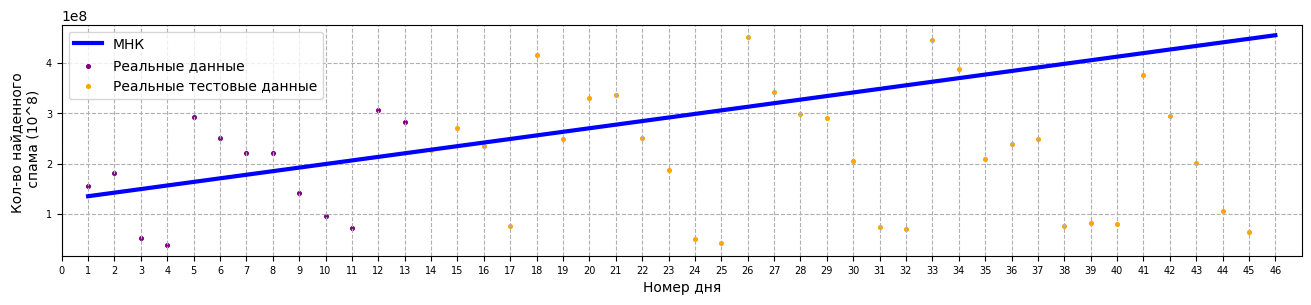

7118689.560439561 127888788.46153846


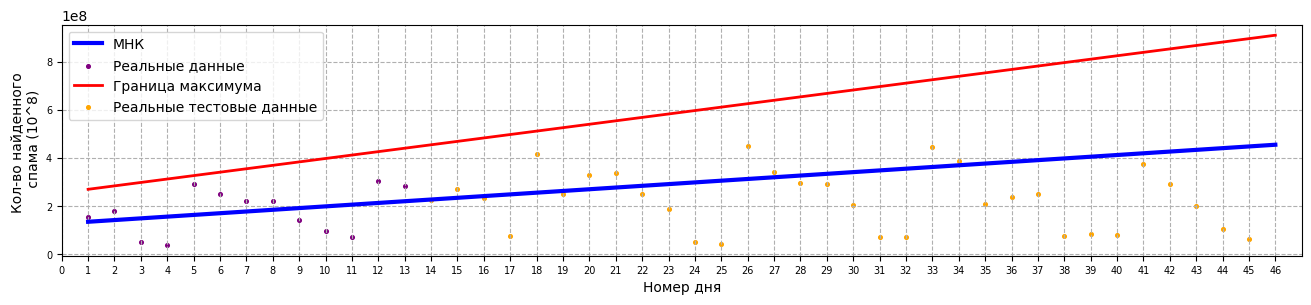

7107148.351648352 127946494.50549449


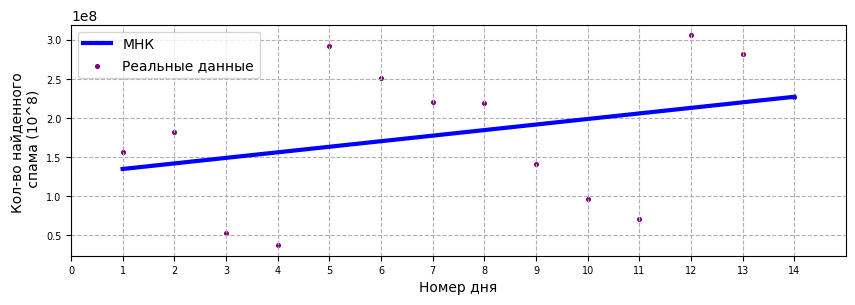

7107148.351648352 127946494.50549449


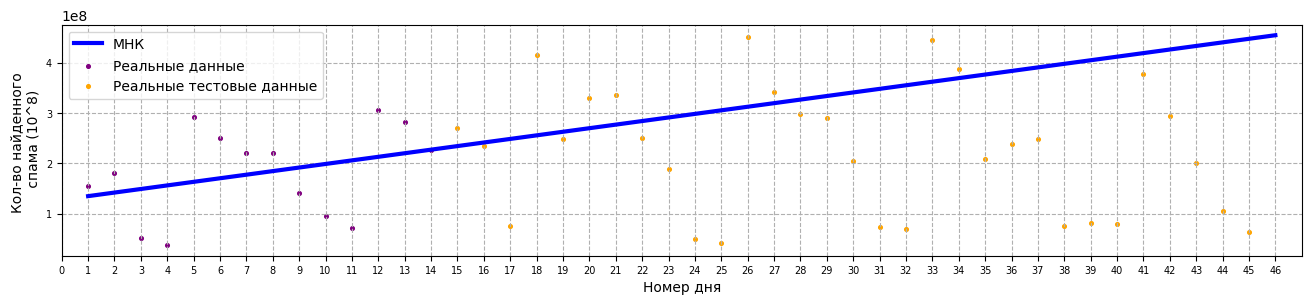

7107148.351648352 127946494.50549449


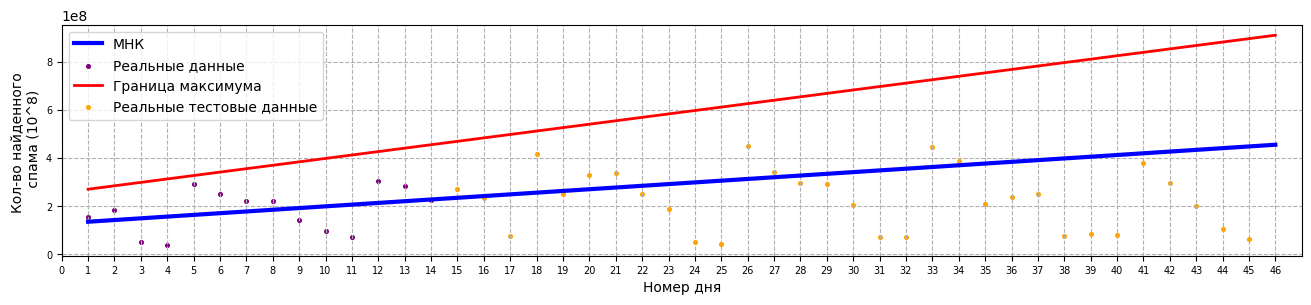

8028417.857142857 123033057.14285713


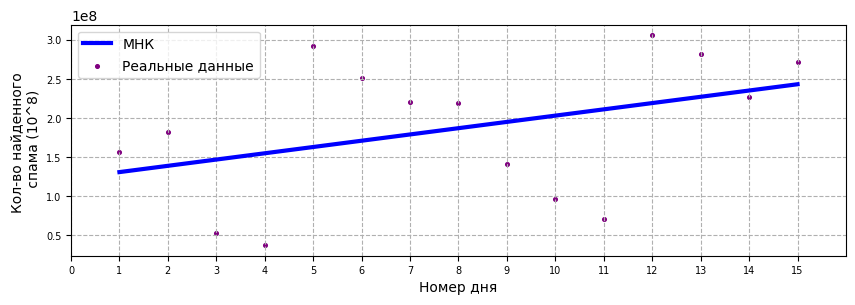

8028417.857142857 123033057.14285713


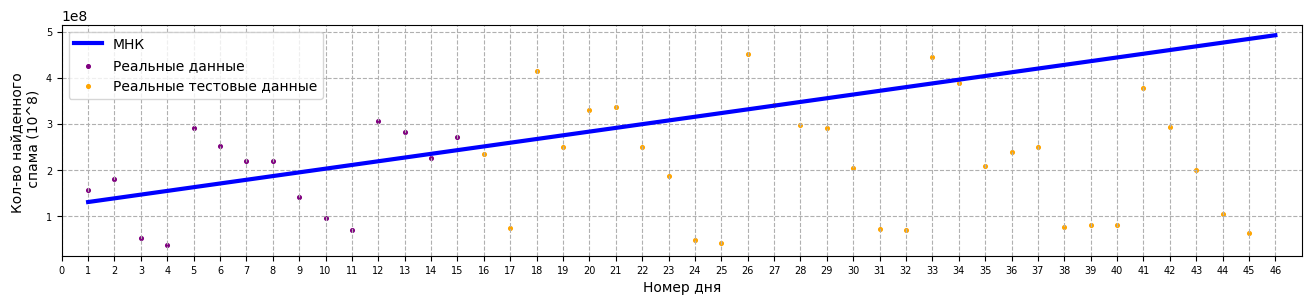

8028417.857142857 123033057.14285713


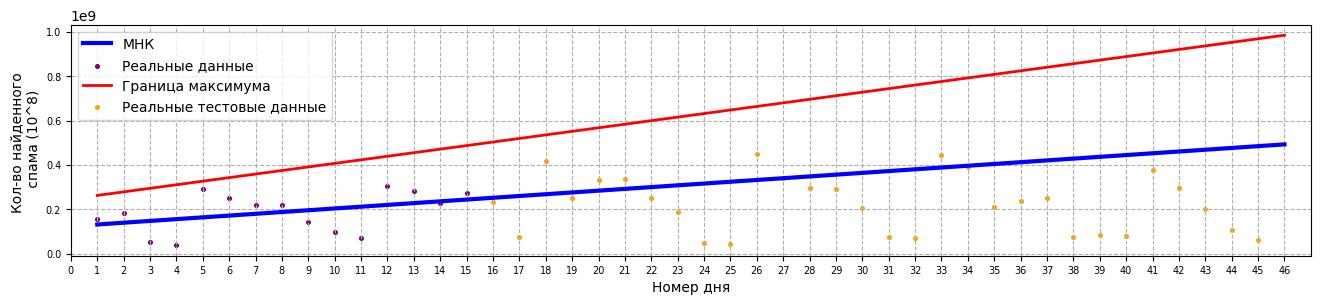

7647434.55882353 125191962.5


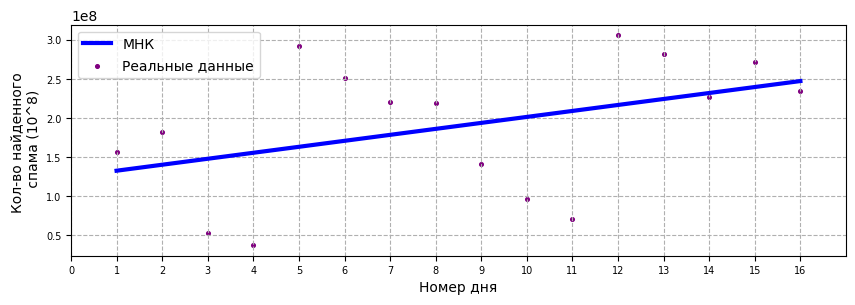

7647434.55882353 125191962.5


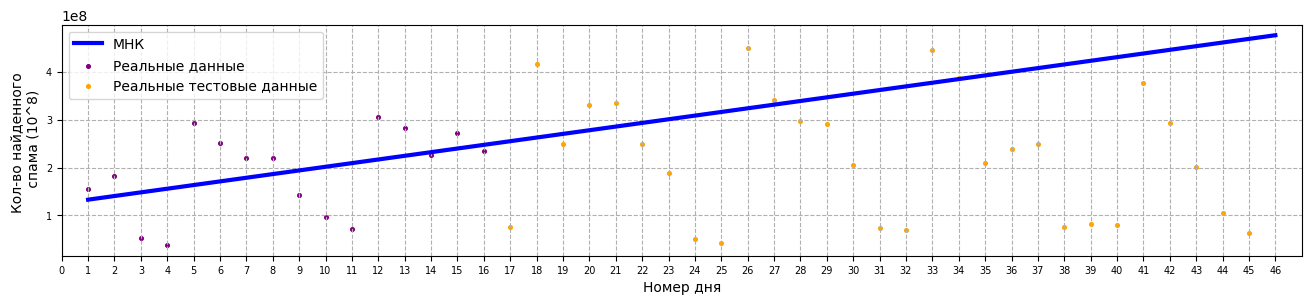

7647434.55882353 125191962.5


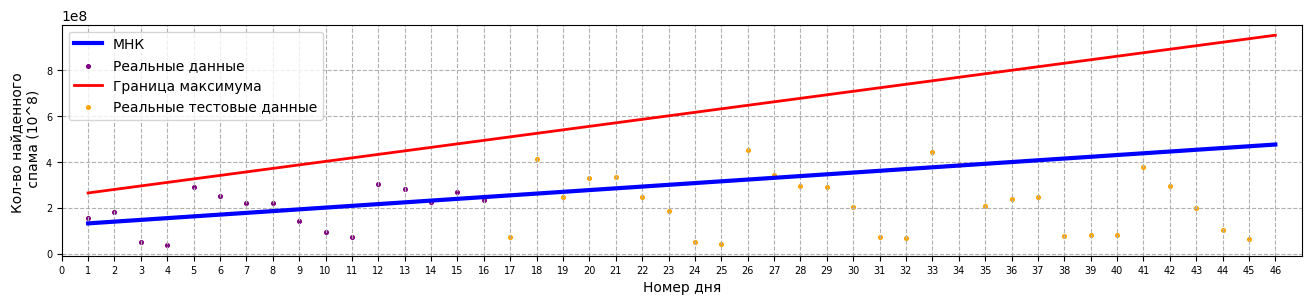

4124221.81372549 146331238.97058824


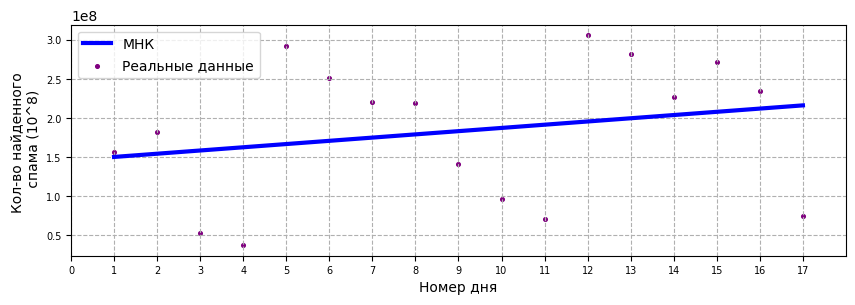

4124221.81372549 146331238.97058824


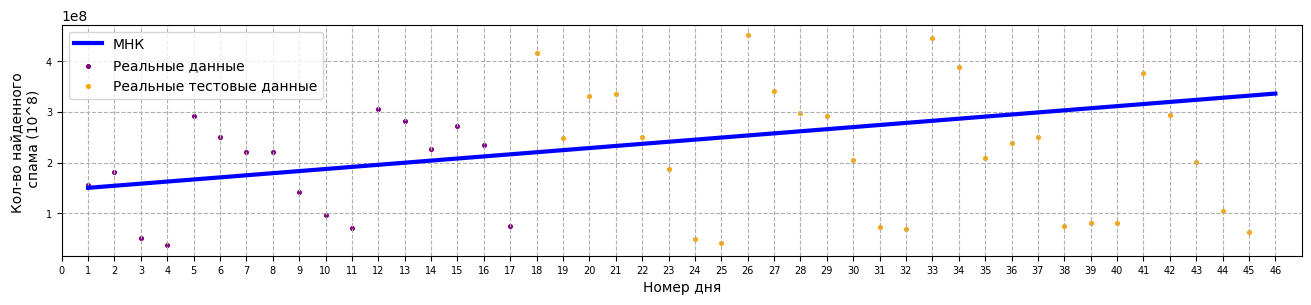

4124221.81372549 146331238.97058824


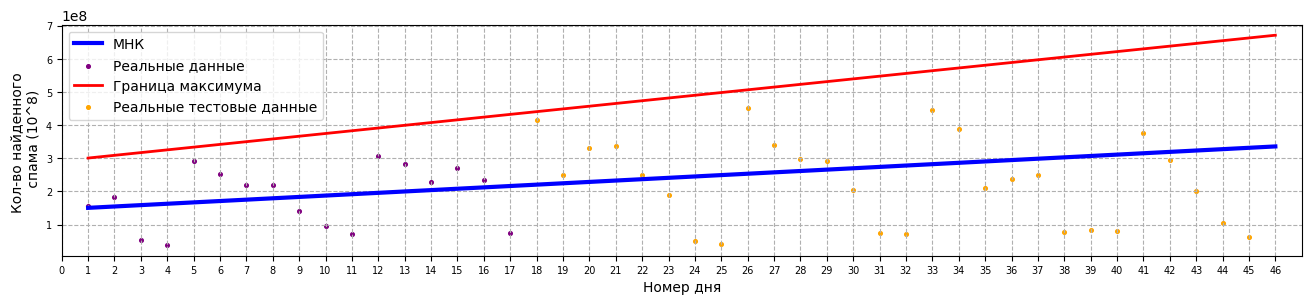

7550761.6099071205 124629820.2614379


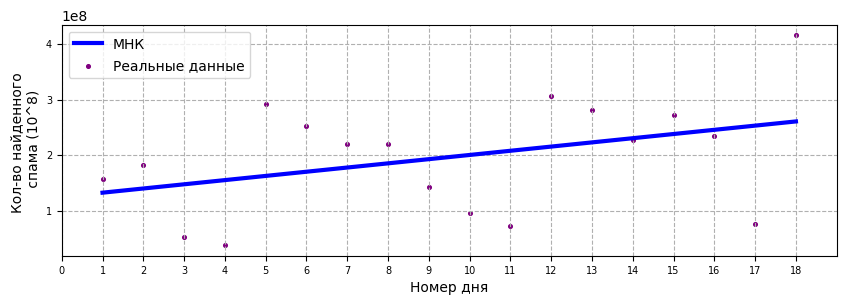

7550761.6099071205 124629820.2614379


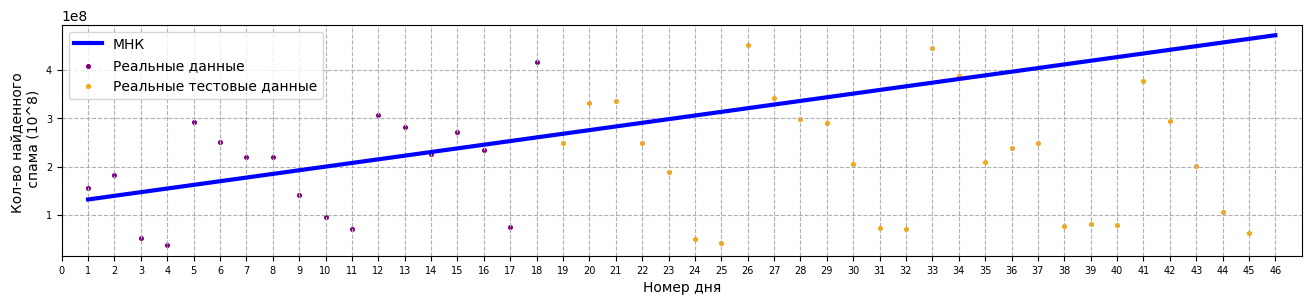

7550761.6099071205 124629820.2614379


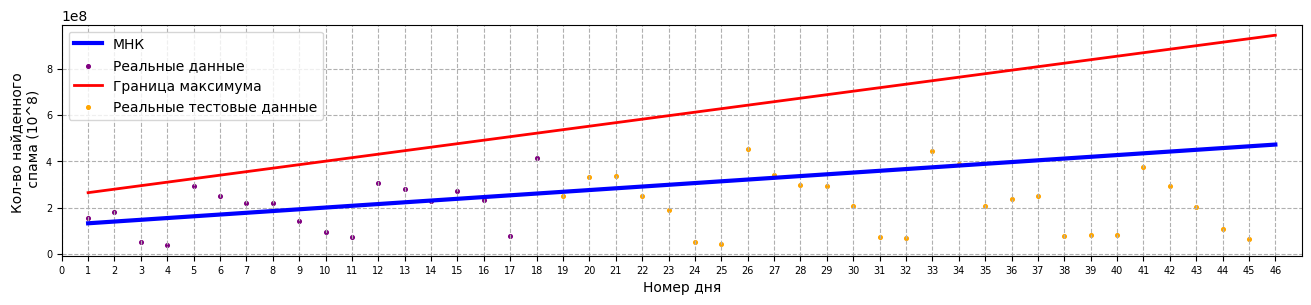

7252659.649122807 126617166.66666669


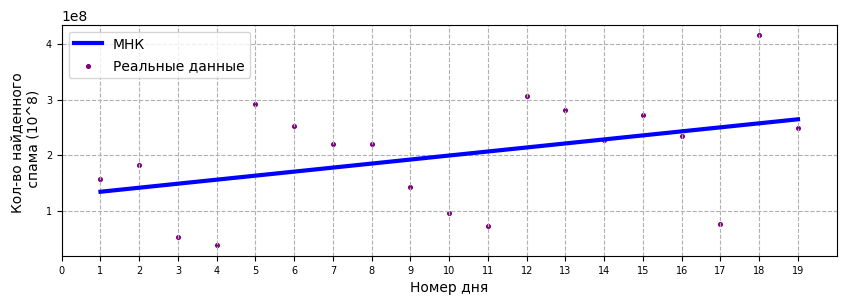

7252659.649122807 126617166.66666669


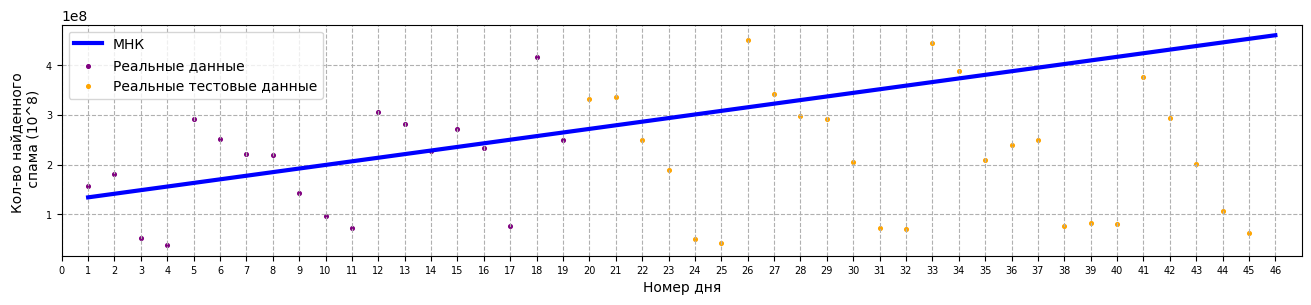

7252659.649122807 126617166.66666669


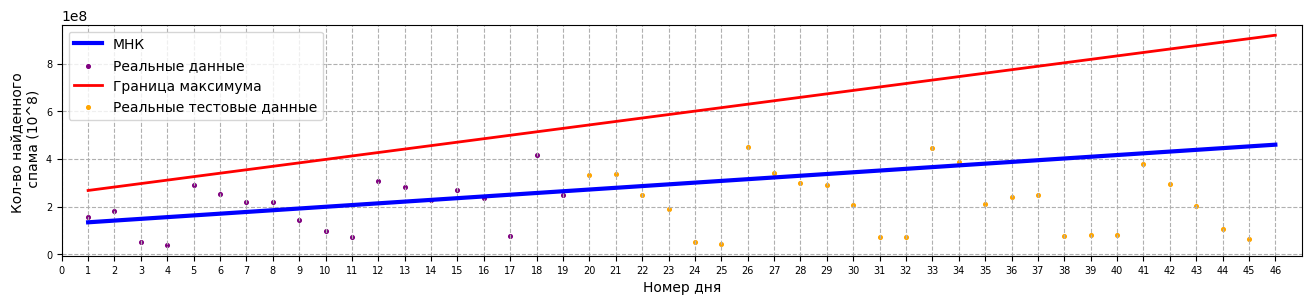

8098454.511278195 120696602.63157895


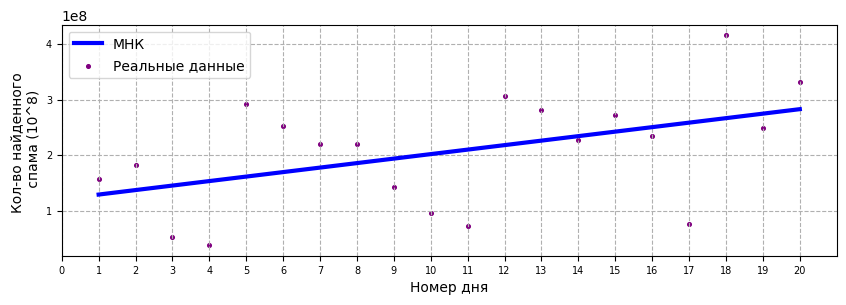

8098454.511278195 120696602.63157895


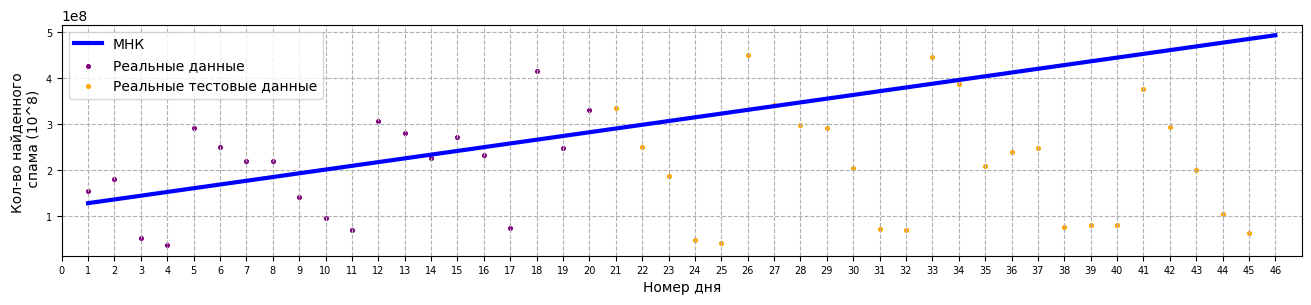

8098454.511278195 120696602.63157895


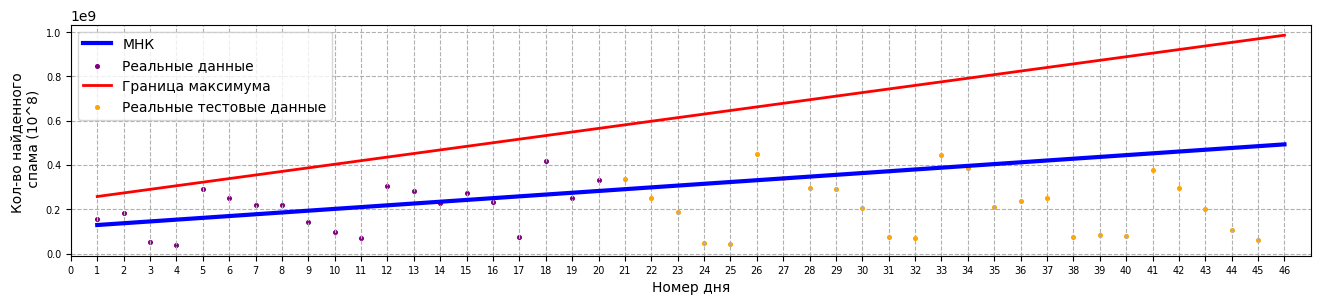

8687316.233766234 116378283.33333333


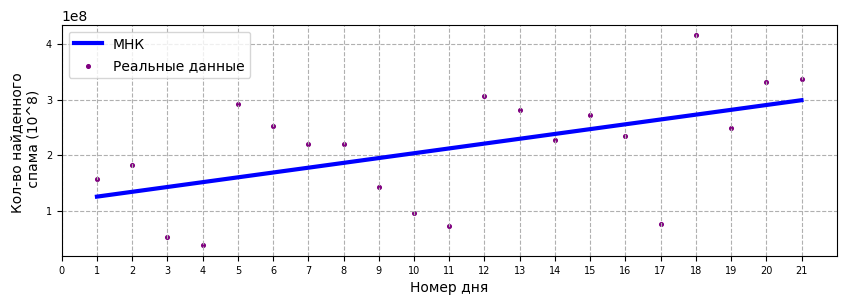

8687316.233766234 116378283.33333333


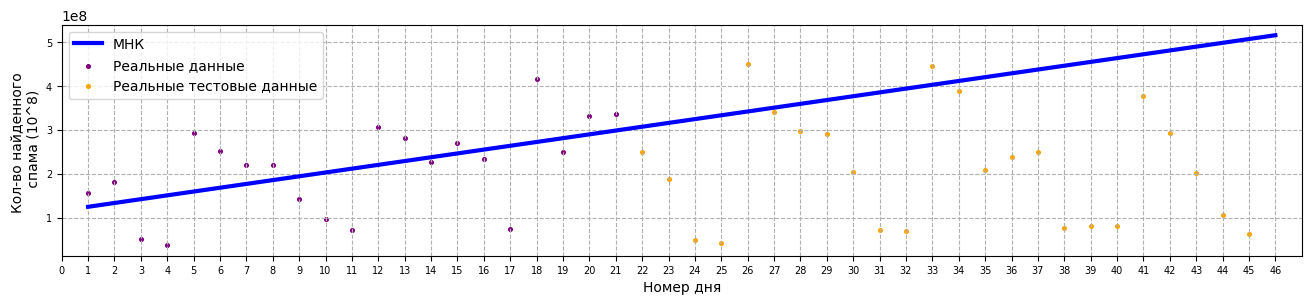

8687316.233766234 116378283.33333333


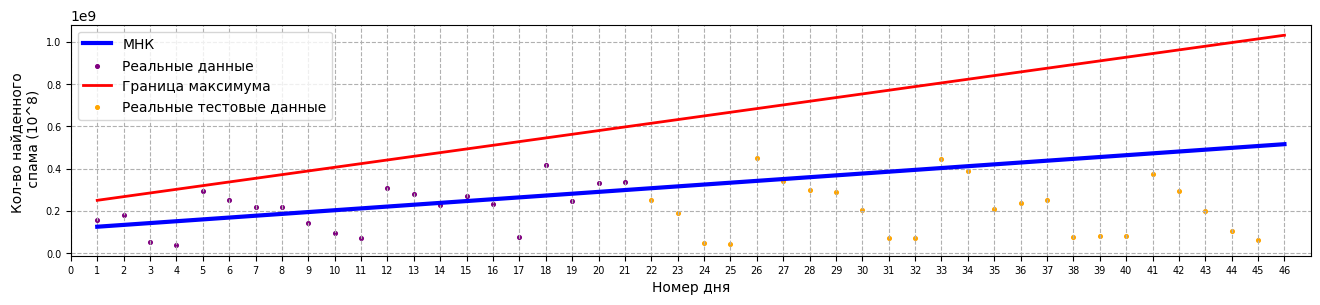

8005845.002823263 121602896.1038961


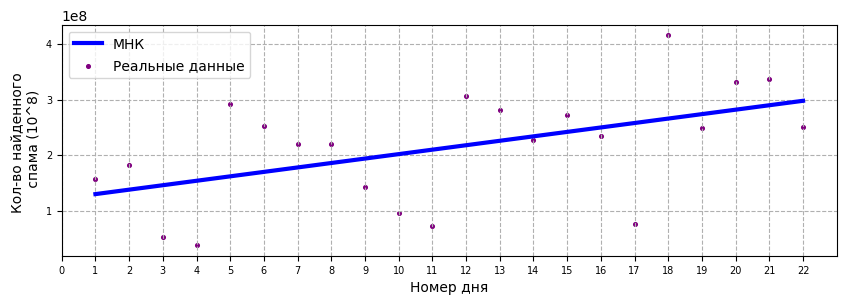

8005845.002823263 121602896.1038961


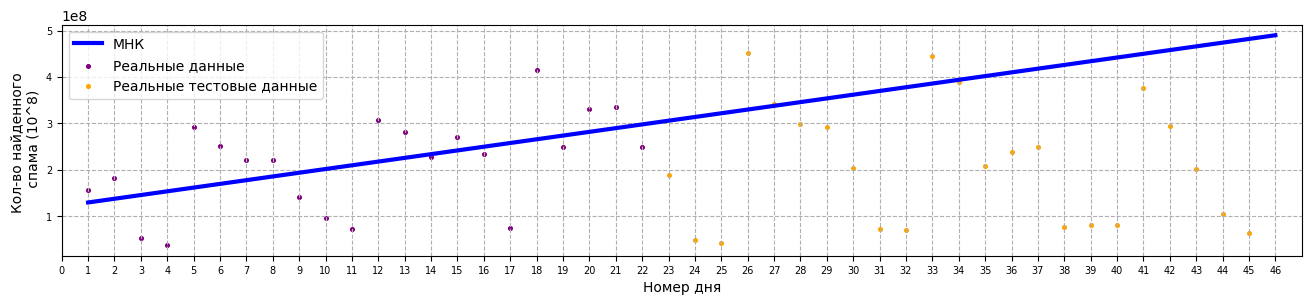

8005845.002823263 121602896.1038961


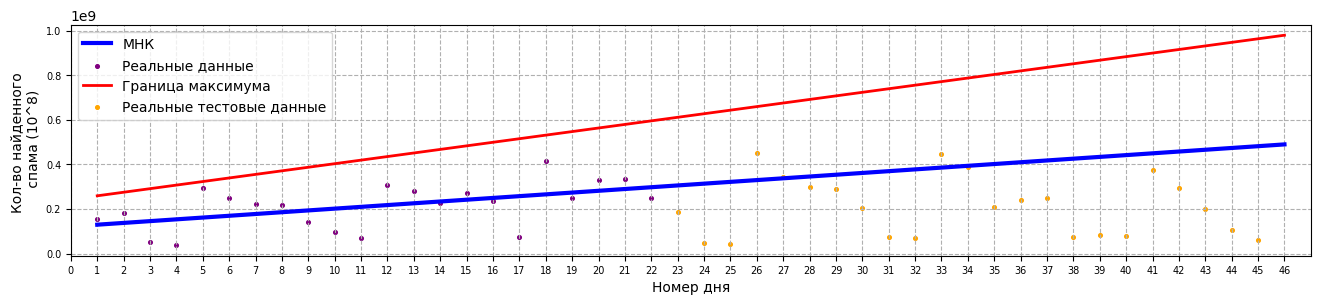

6726879.446640316 131834620.5533597


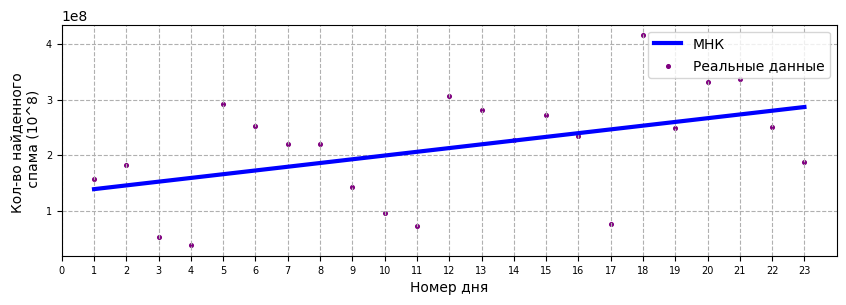

6726879.446640316 131834620.5533597


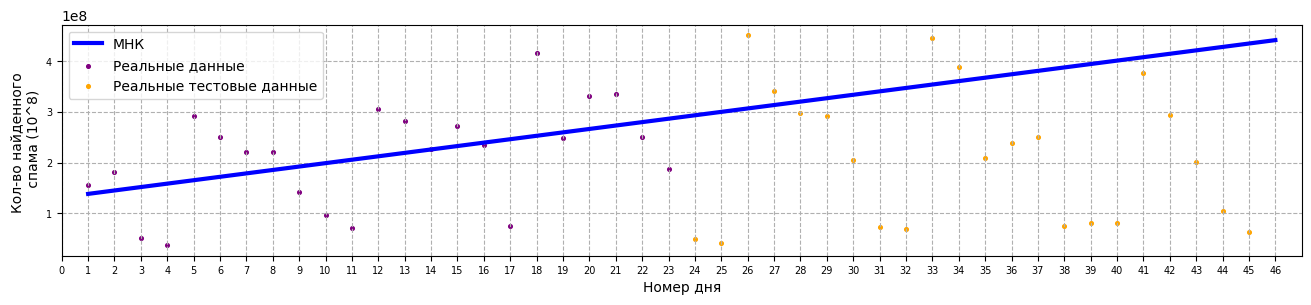

6726879.446640316 131834620.5533597


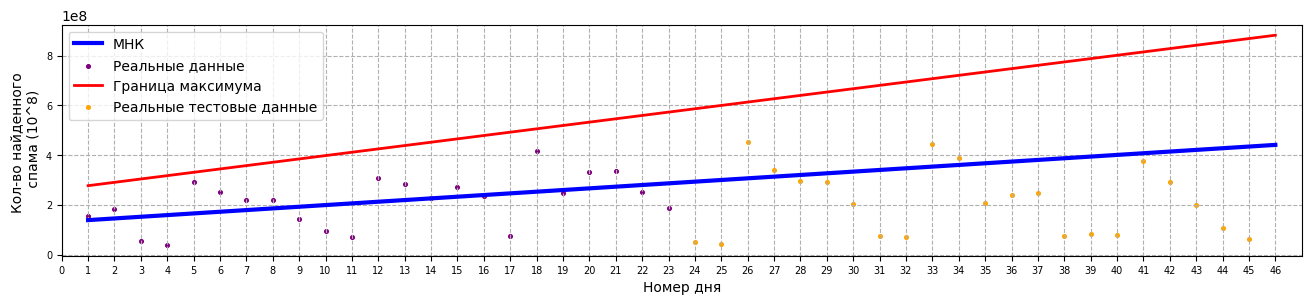

4289697.173913044 152144472.82608697


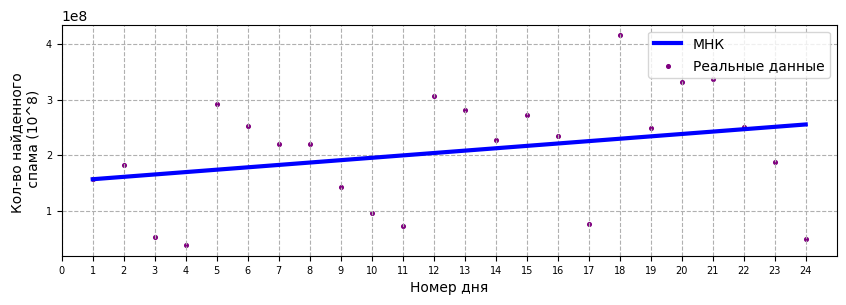

4289697.173913044 152144472.82608697


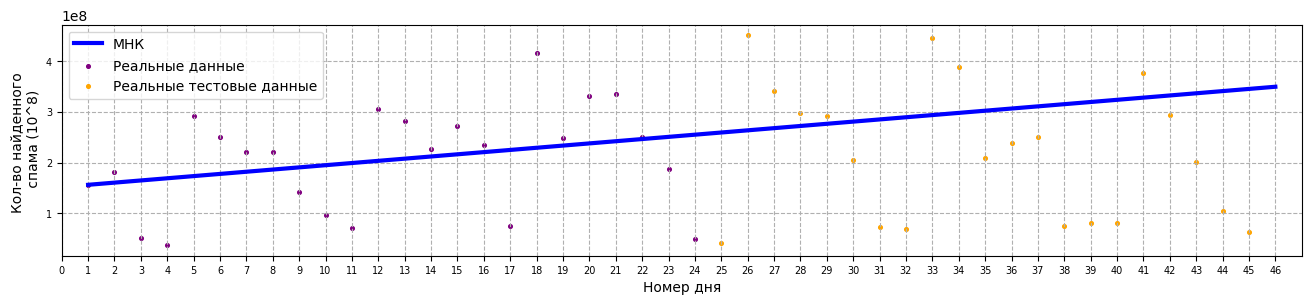

4289697.173913044 152144472.82608697


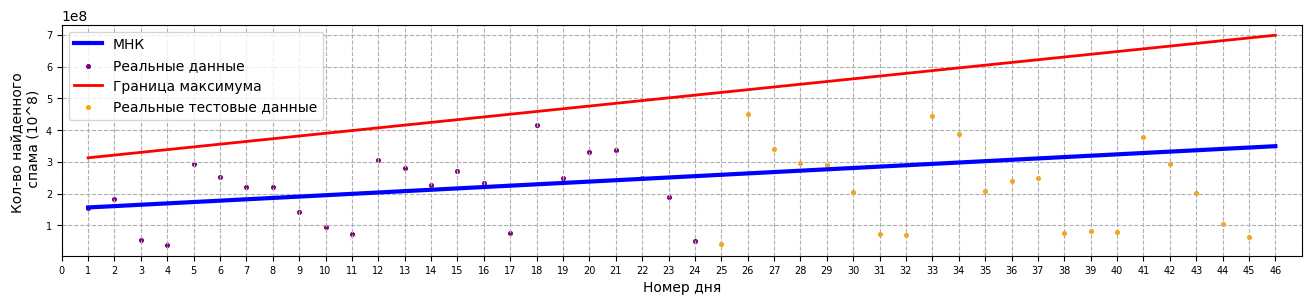

2285047.3076923075 169518105.0


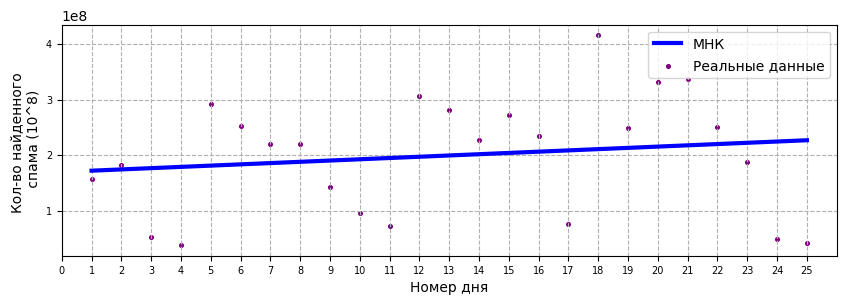

2285047.3076923075 169518105.0


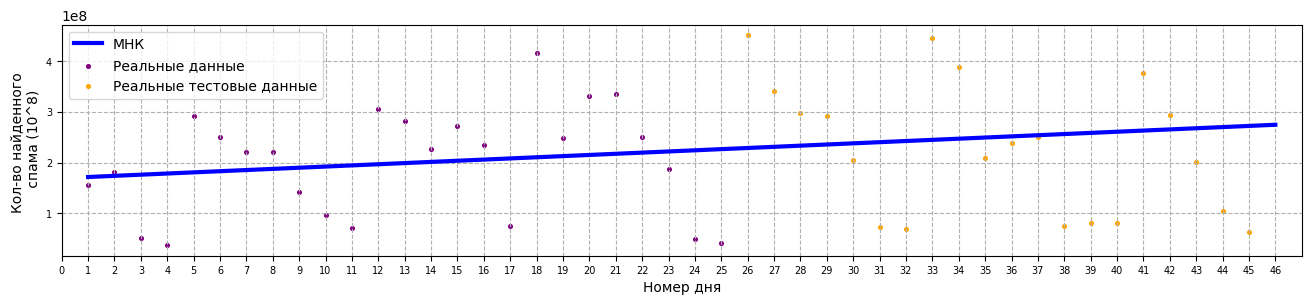

2285047.3076923075 169518105.0


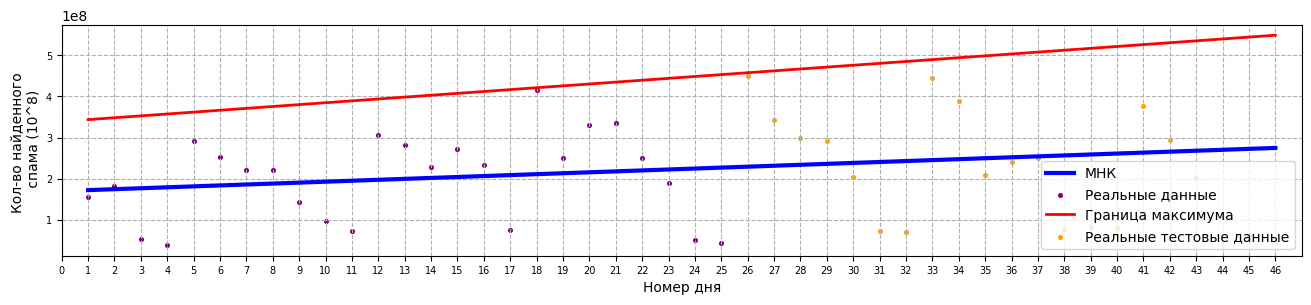

4182176.923076923 152443938.46153846


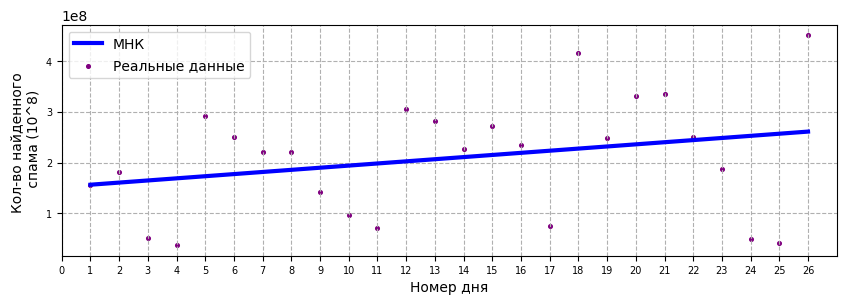

4182176.923076923 152443938.46153846


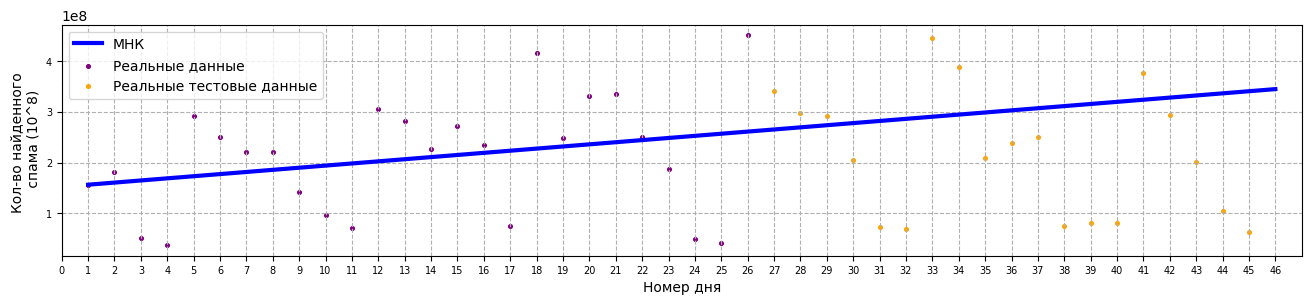

4182176.923076923 152443938.46153846


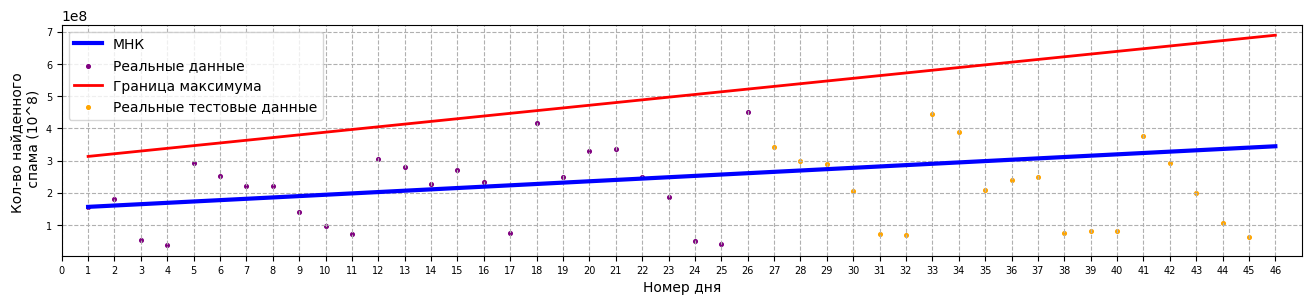

4788726.800976801 146782806.26780626


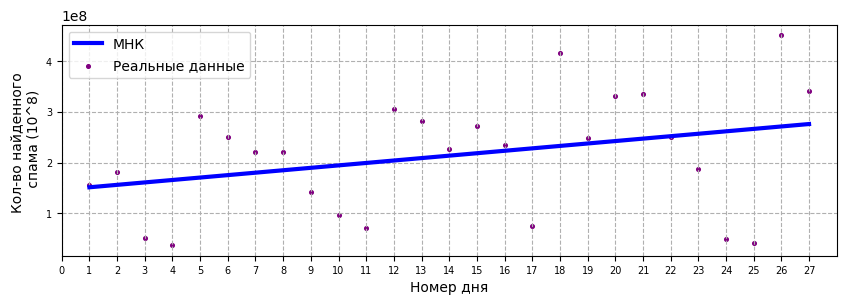

4788726.800976801 146782806.26780626


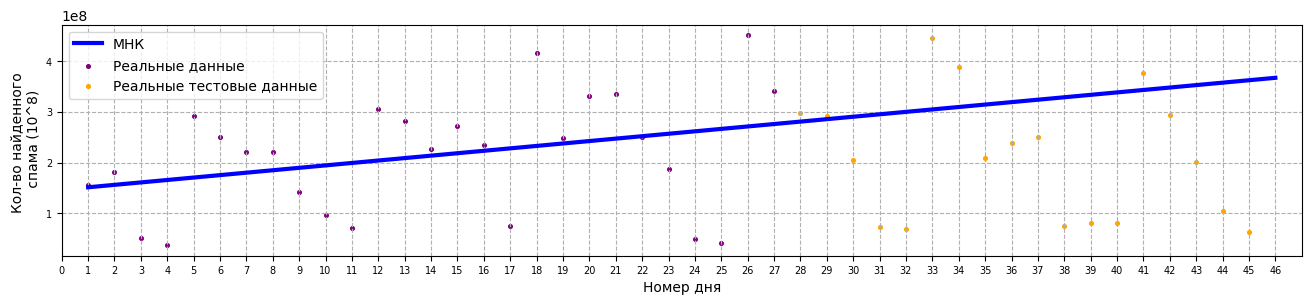

4788726.800976801 146782806.26780626


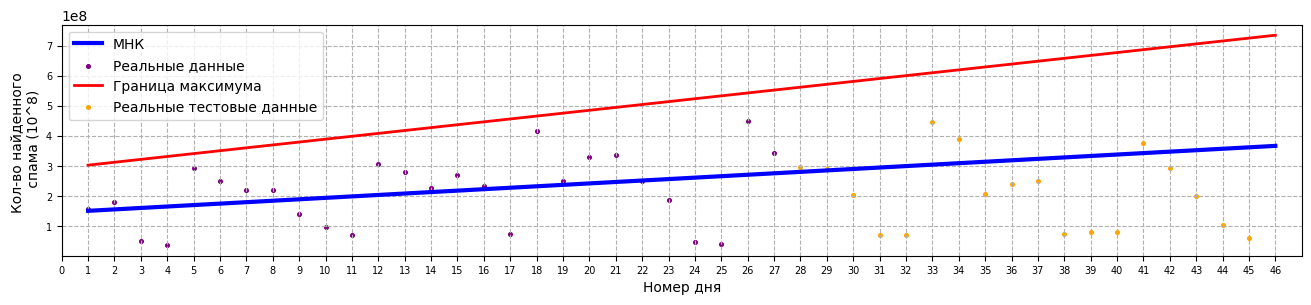

4913114.8056923915 145580388.8888889


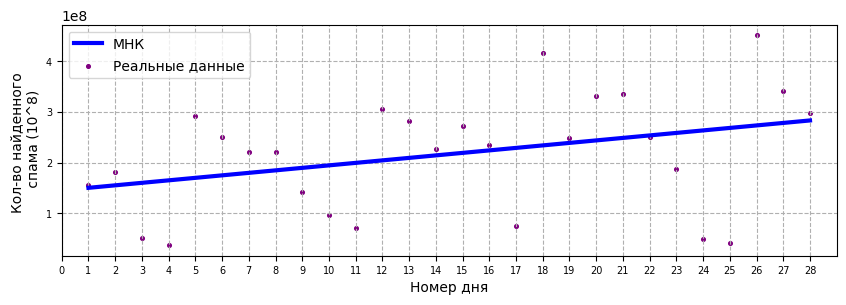

4913114.8056923915 145580388.8888889


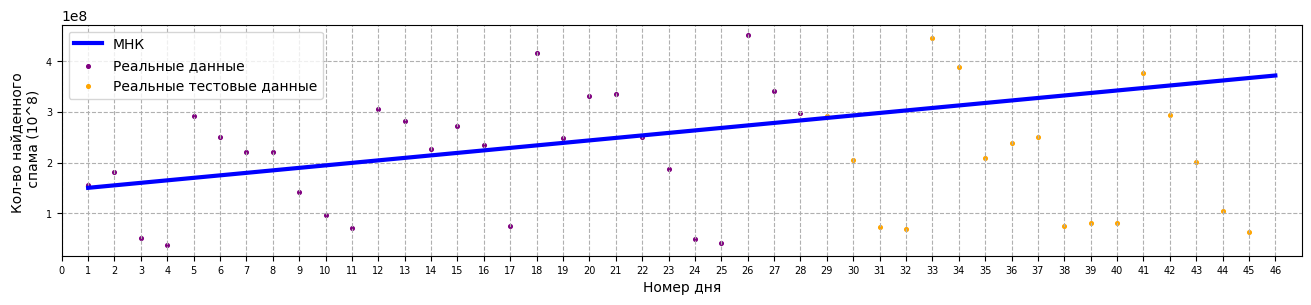

4913114.8056923915 145580388.8888889


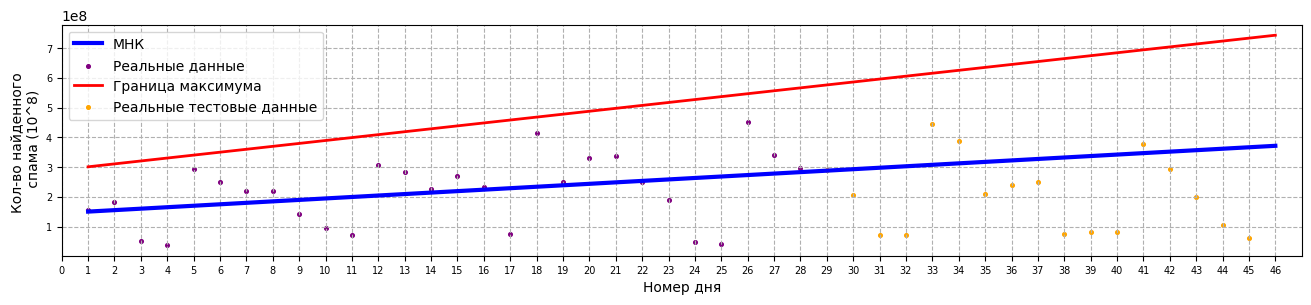

4934320.197044335 145368334.97536945


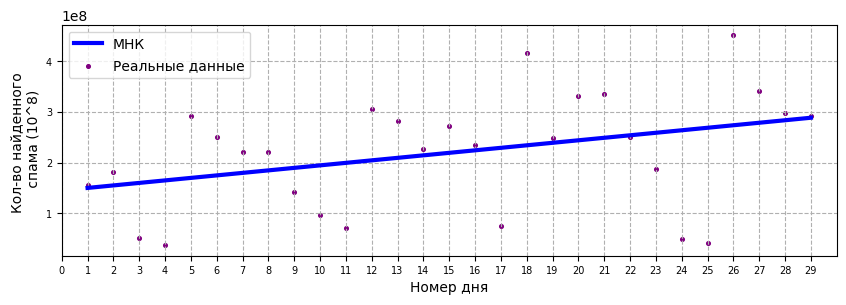

4934320.197044335 145368334.97536945


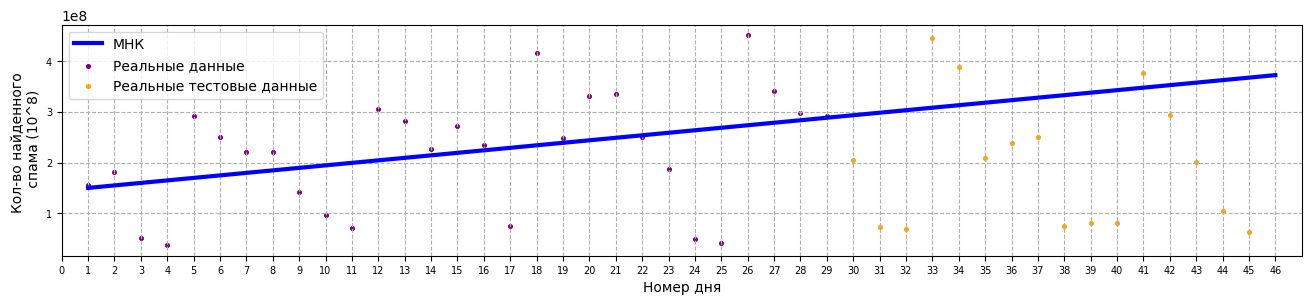

4934320.197044335 145368334.97536945


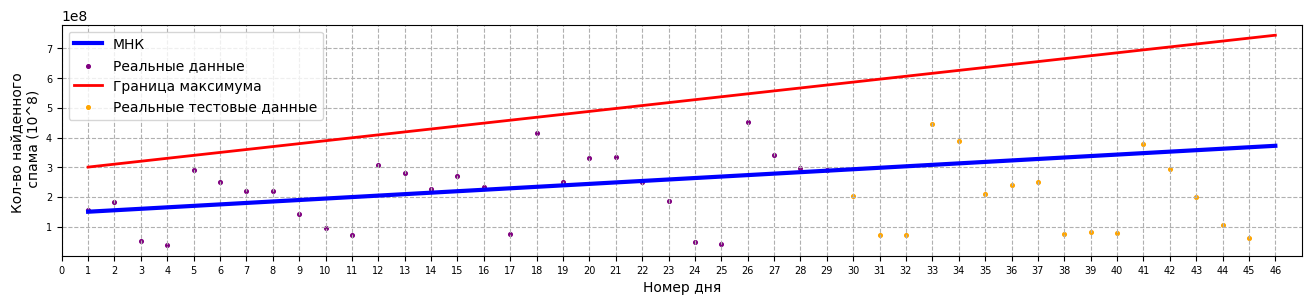

4362539.933259177 151276731.03448278


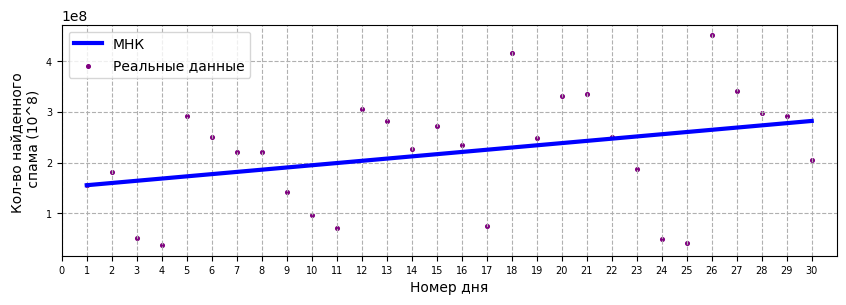

4362539.933259177 151276731.03448278


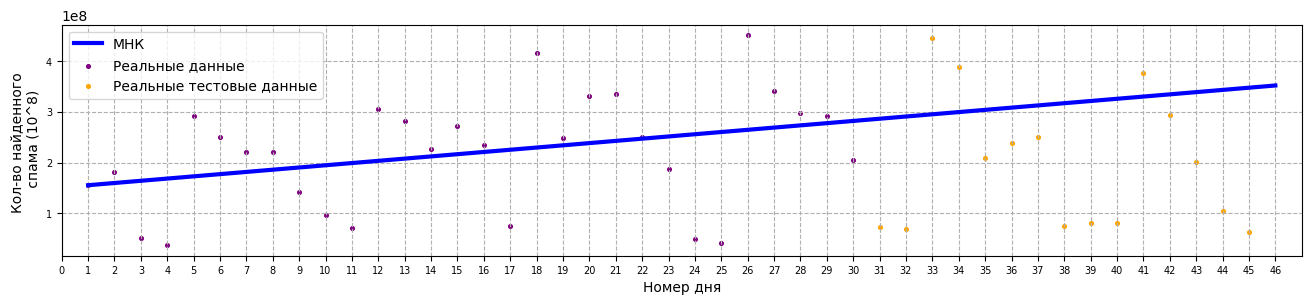

4362539.933259177 151276731.03448278


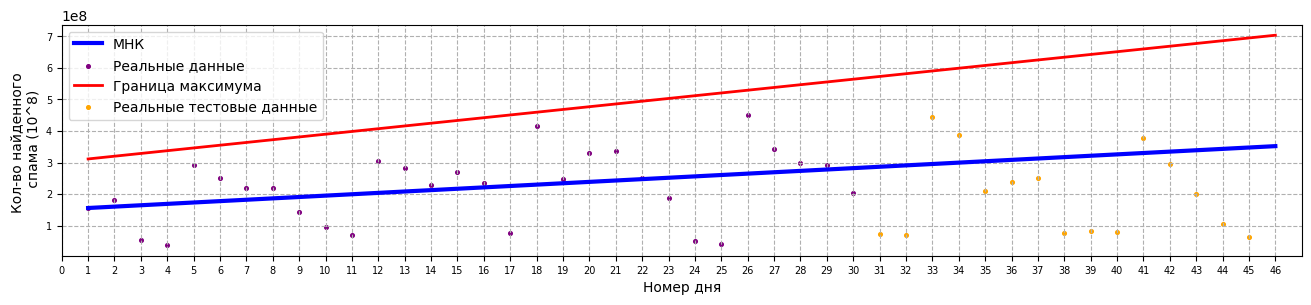

3071345.564516129 165049470.96774194


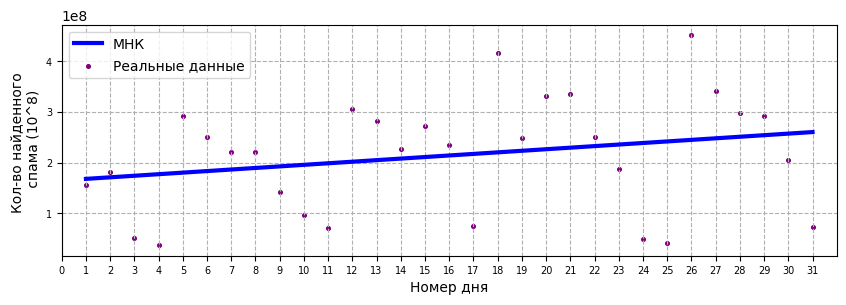

3071345.564516129 165049470.96774194


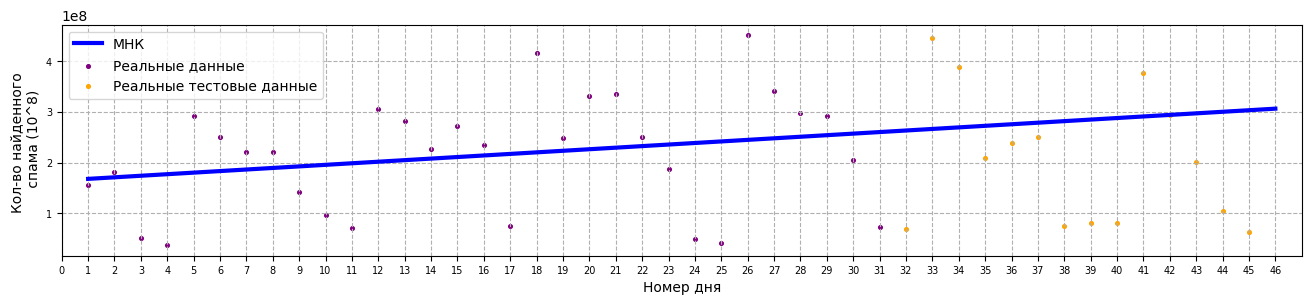

3071345.564516129 165049470.96774194


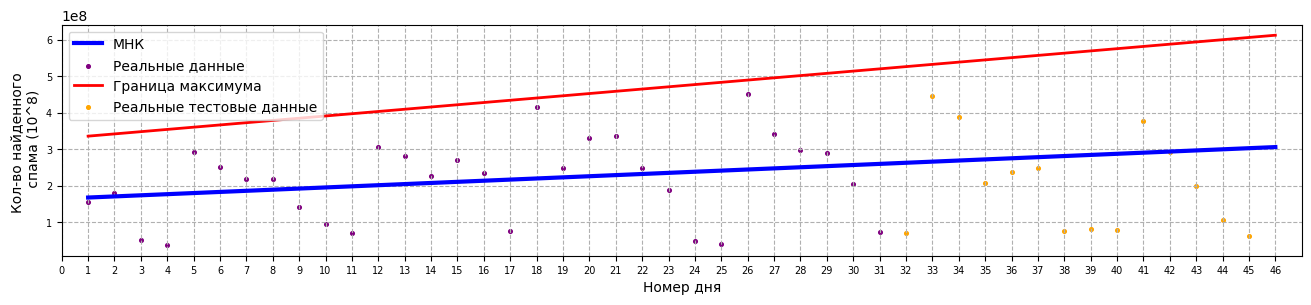

1975027.2177419355 177108972.78225806


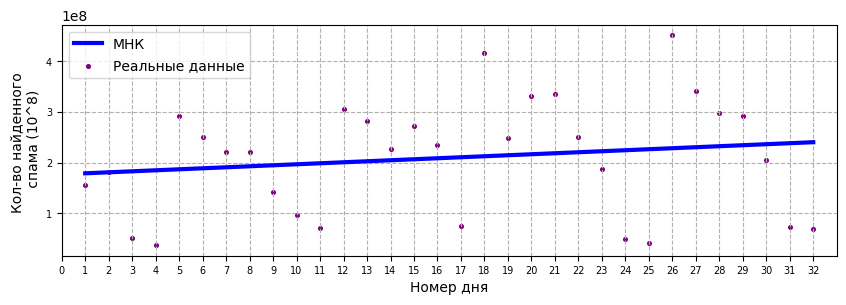

1975027.2177419355 177108972.78225806


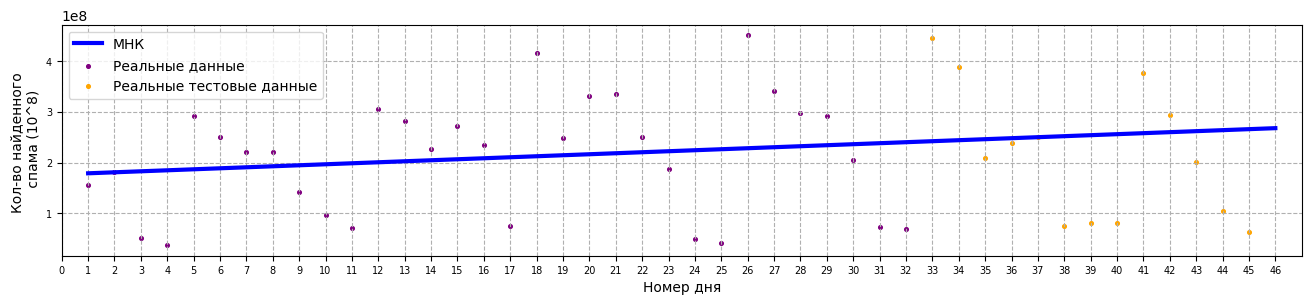

1975027.2177419355 177108972.78225806


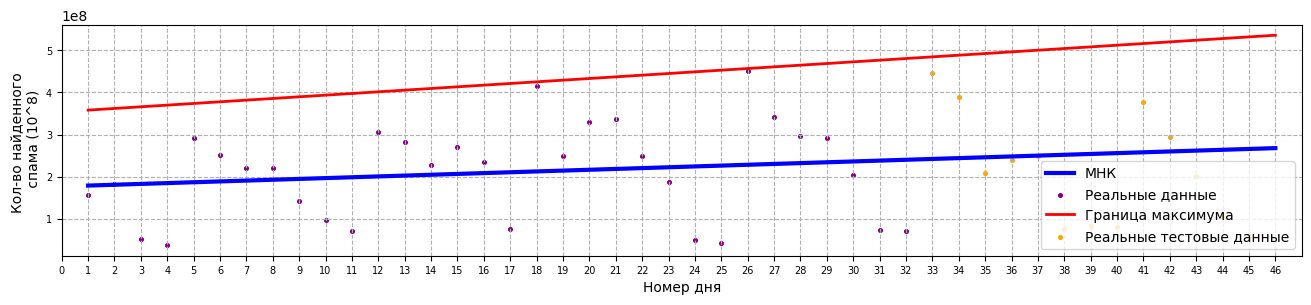

3060592.0788770053 164805904.3560606


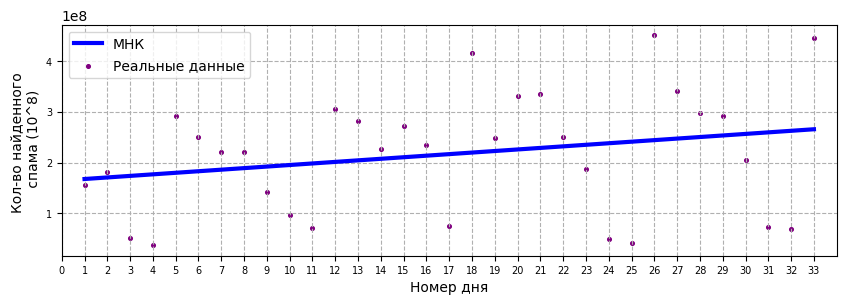

3060592.0788770053 164805904.3560606


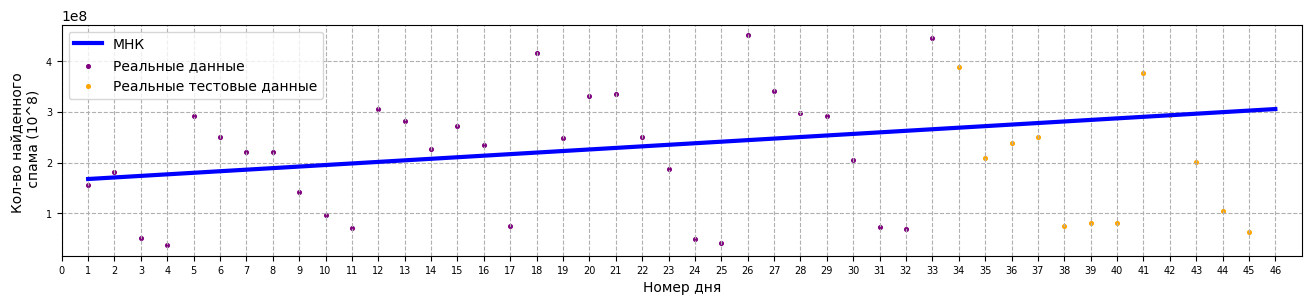

3060592.0788770053 164805904.3560606


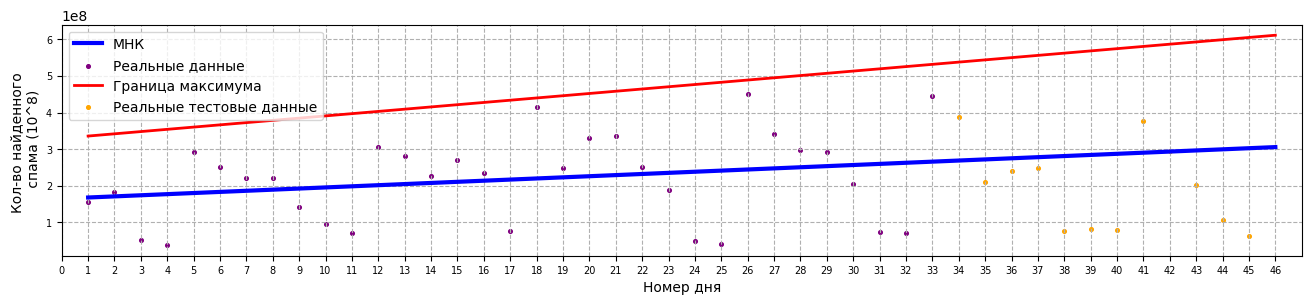

3662969.2131398013 157778171.12299466


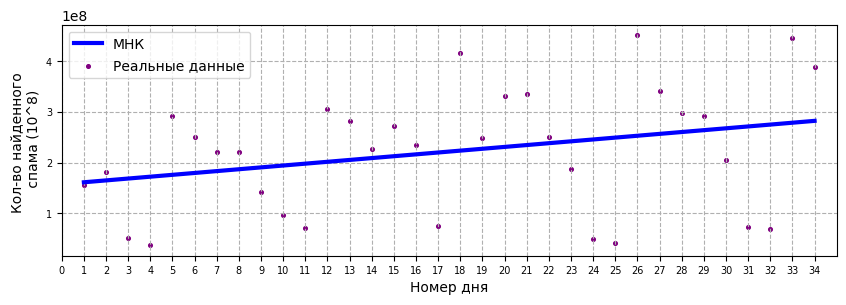

3662969.2131398013 157778171.12299466


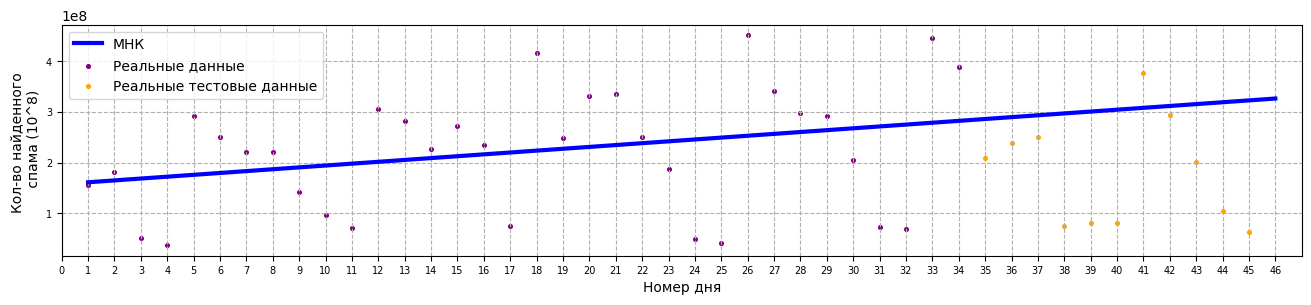

3662969.2131398013 157778171.12299466


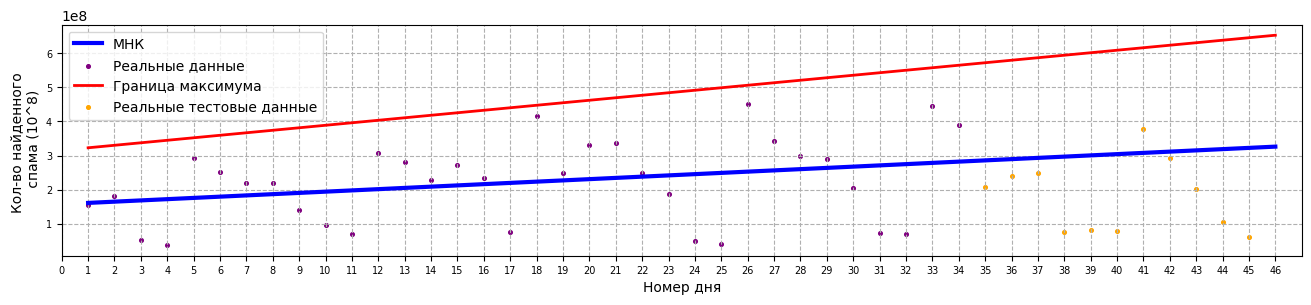

3296204.4817927172 162179347.89915967


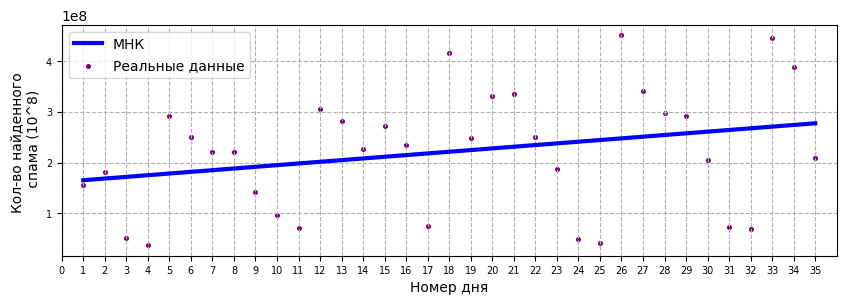

3296204.4817927172 162179347.89915967


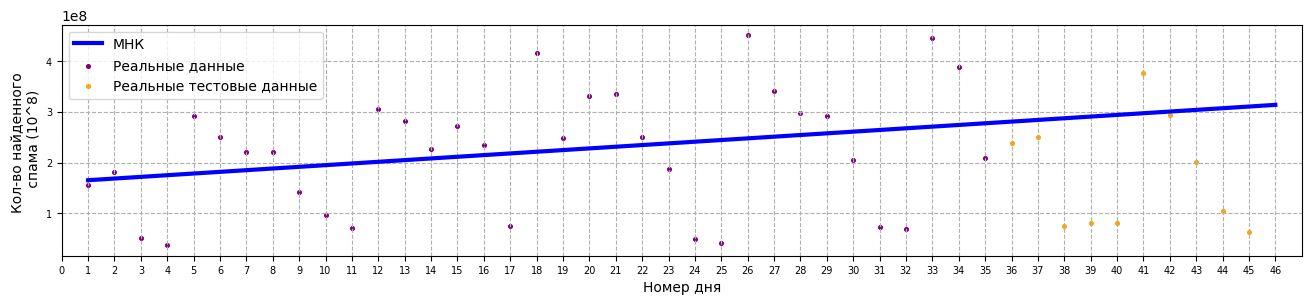

3296204.4817927172 162179347.89915967


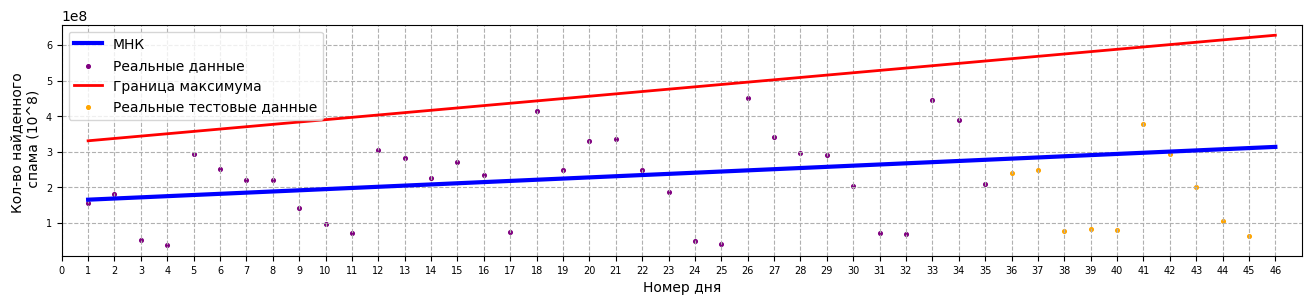

3108298.133848134 164496859.52380952


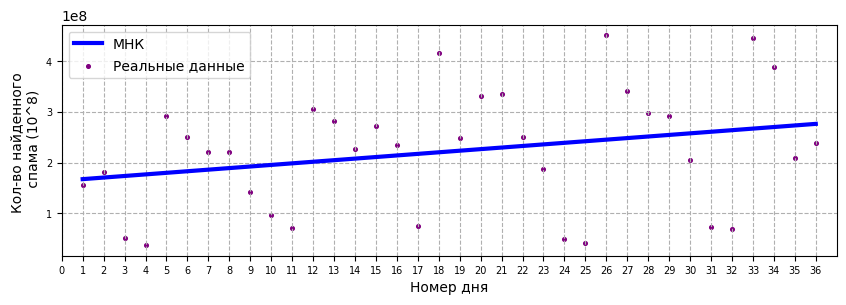

3108298.133848134 164496859.52380952


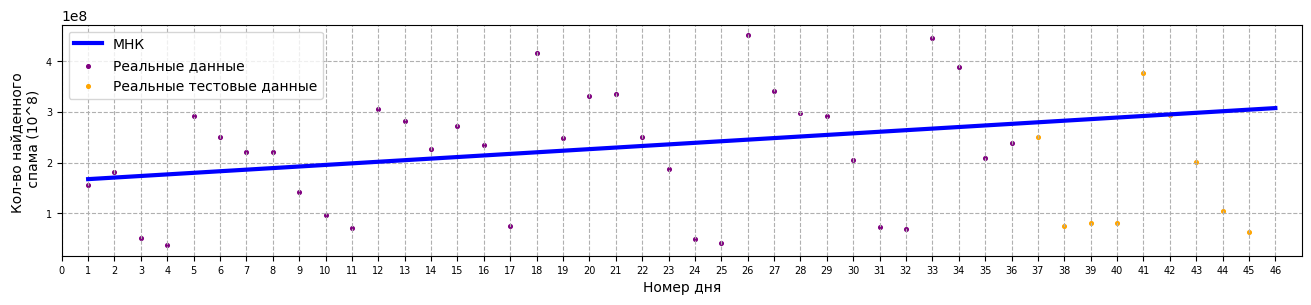

3108298.133848134 164496859.52380952


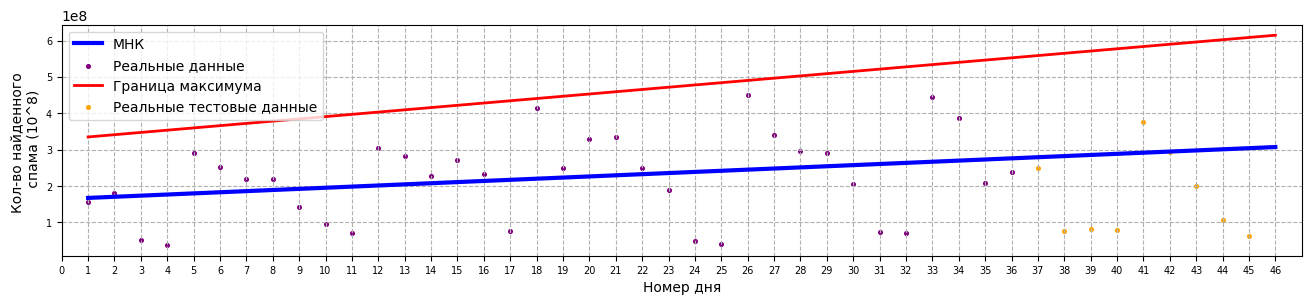

2980566.0265528685 166114799.54954958


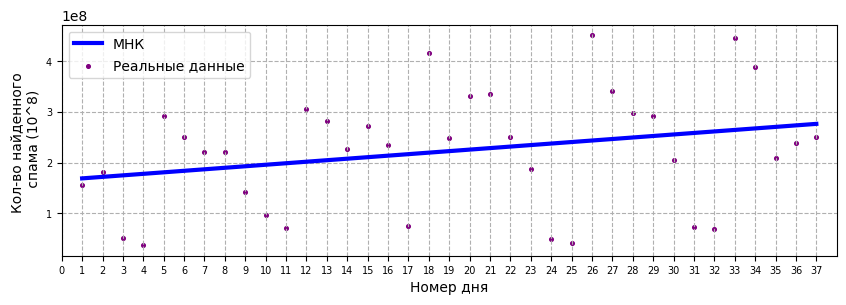

2980566.0265528685 166114799.54954958


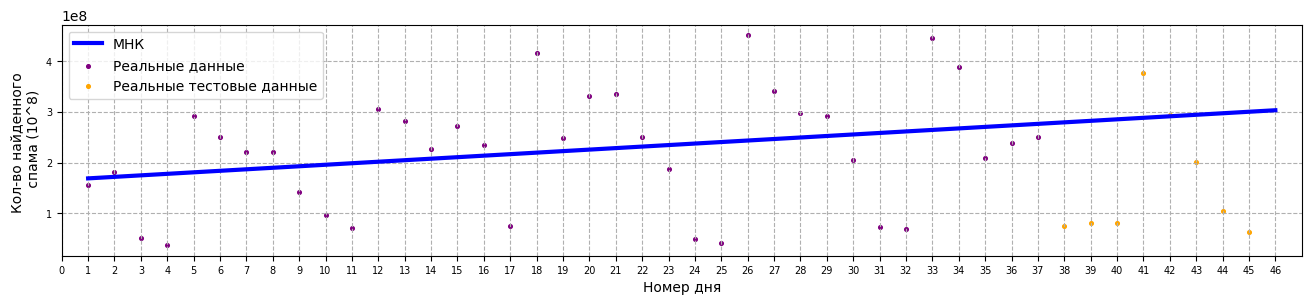

2980566.0265528685 166114799.54954958


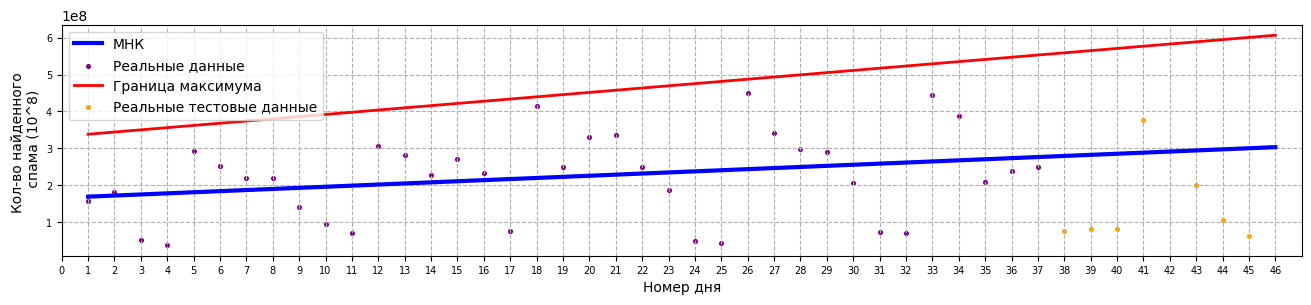

2158500.0 176801657.89473686


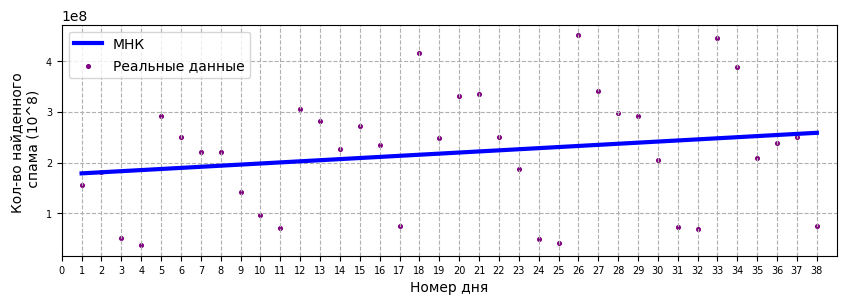

2158500.0 176801657.89473686


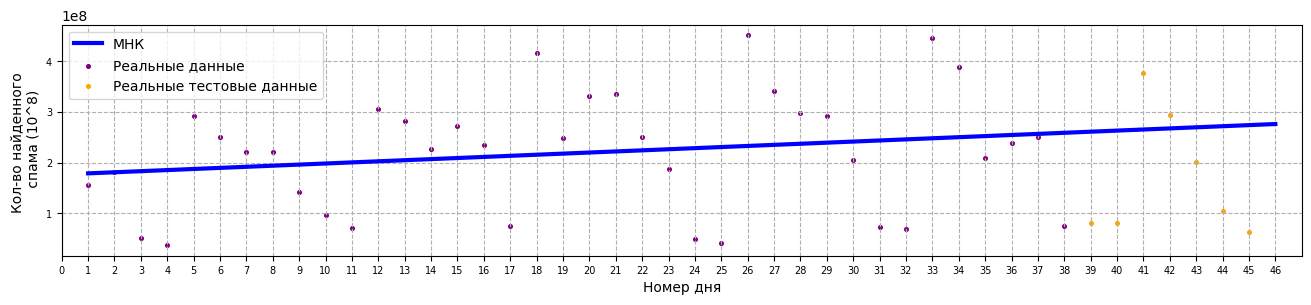

2158500.0 176801657.89473686


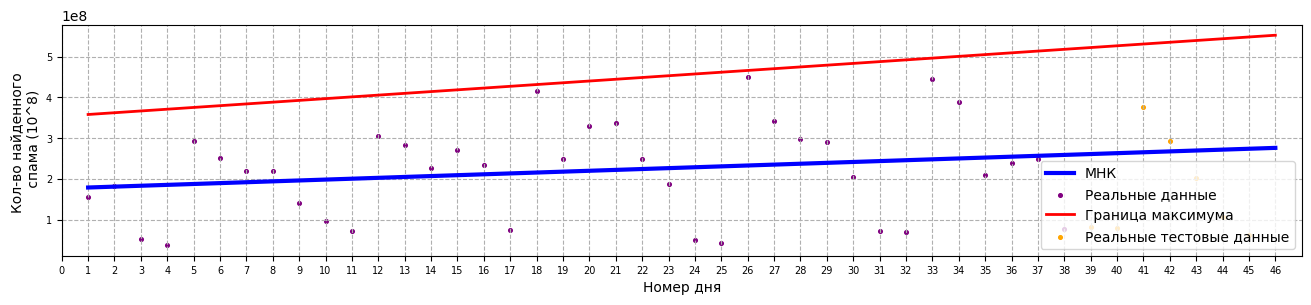

1470574.3927125507 185973999.32523617


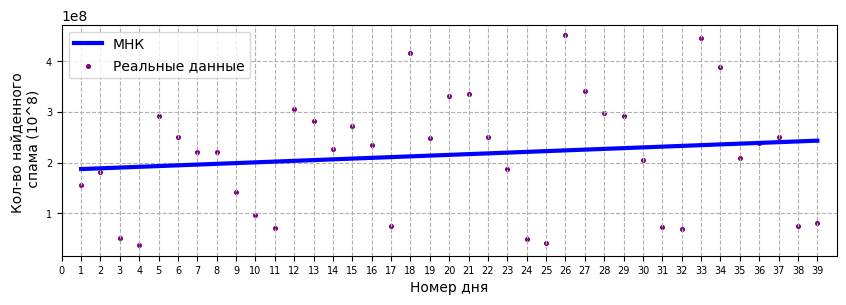

1470574.3927125507 185973999.32523617


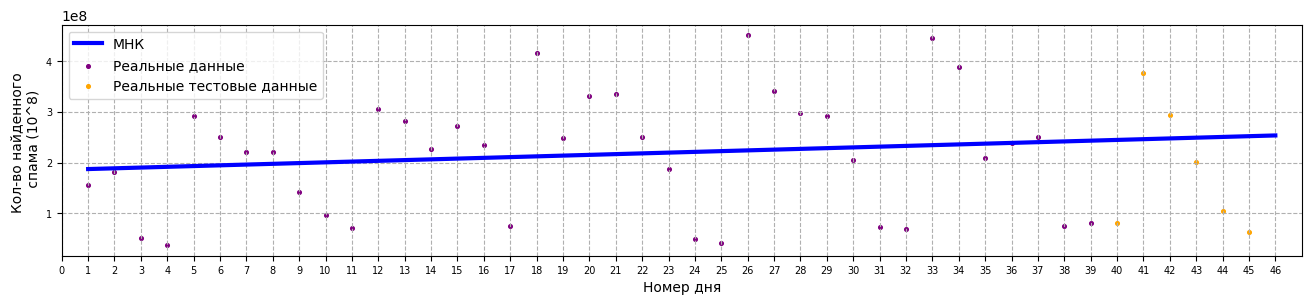

1470574.3927125507 185973999.32523617


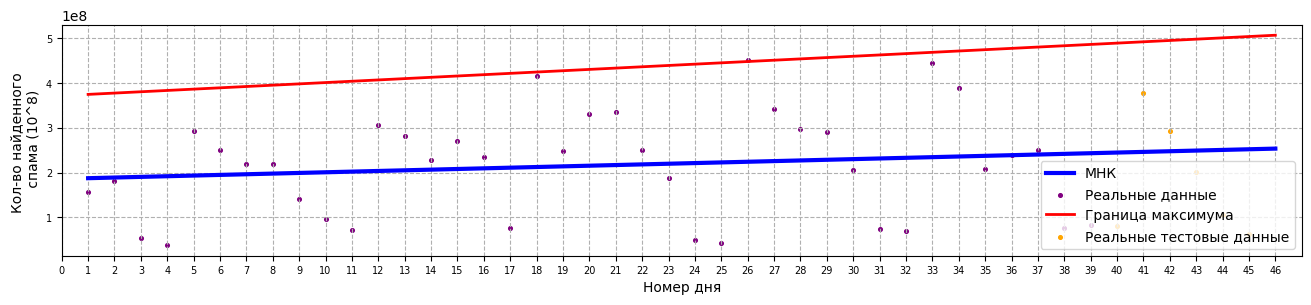

868915.3377110694 194196673.07692307


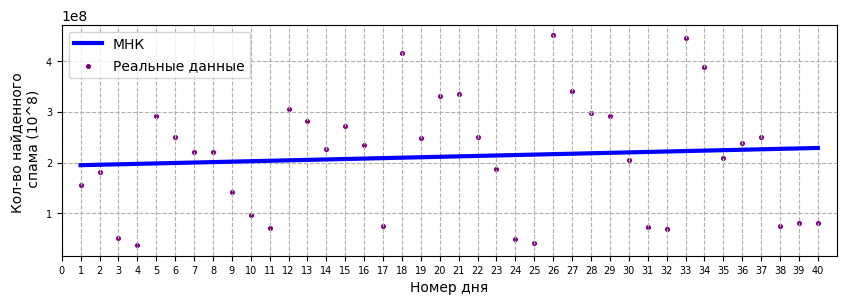

868915.3377110694 194196673.07692307


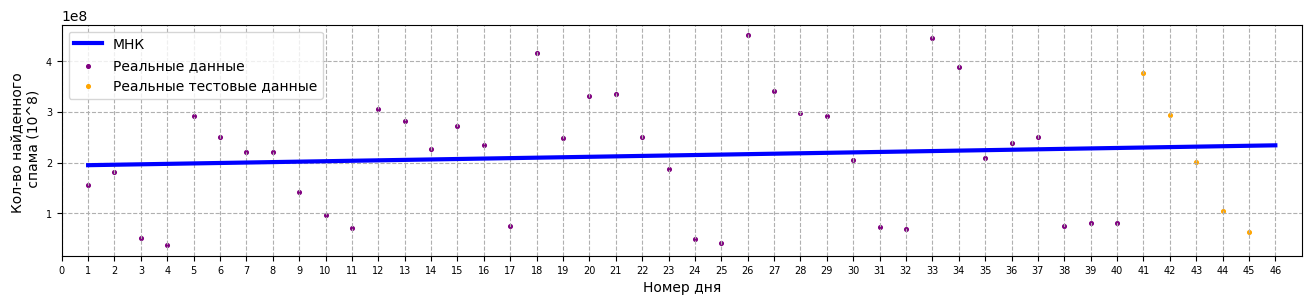

868915.3377110694 194196673.07692307


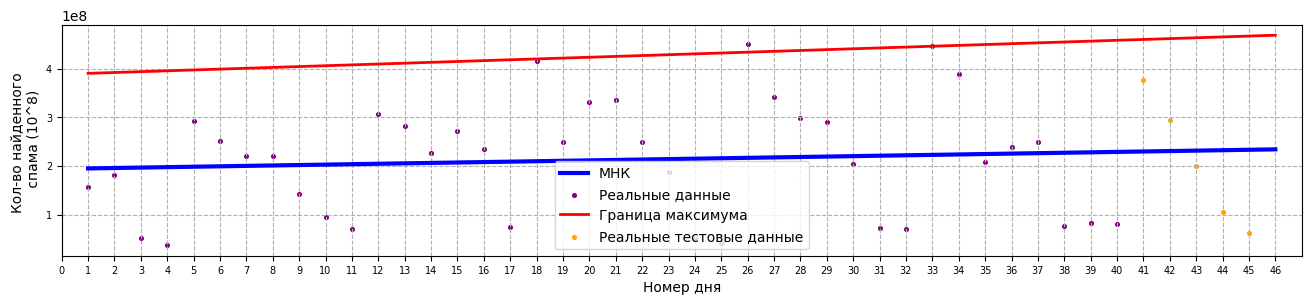

1382221.2543554008 187010390.24390244


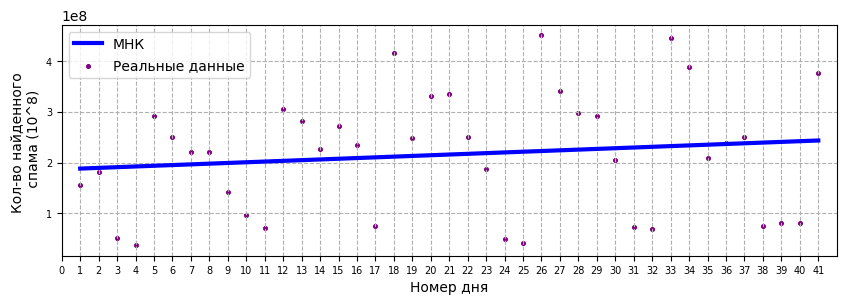

1382221.2543554008 187010390.24390244


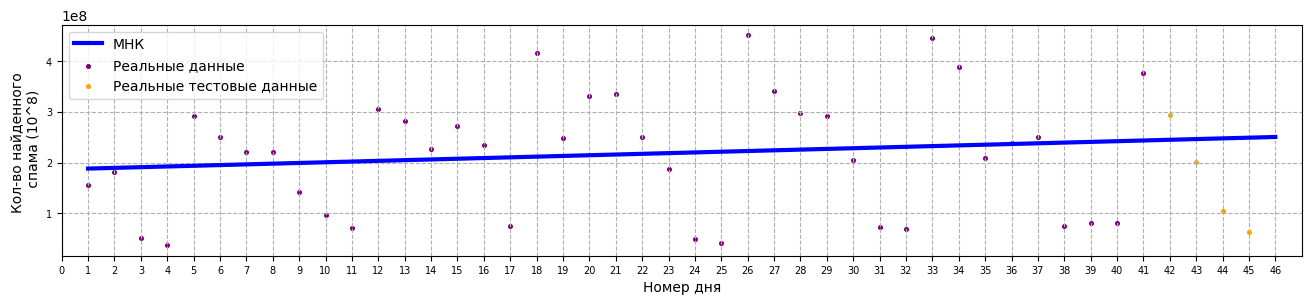

1382221.2543554008 187010390.24390244


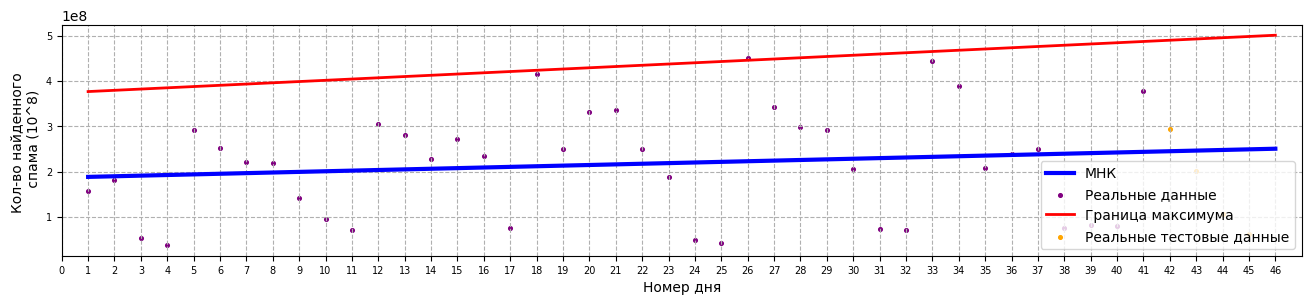

1544499.7163925127 184684398.95470384


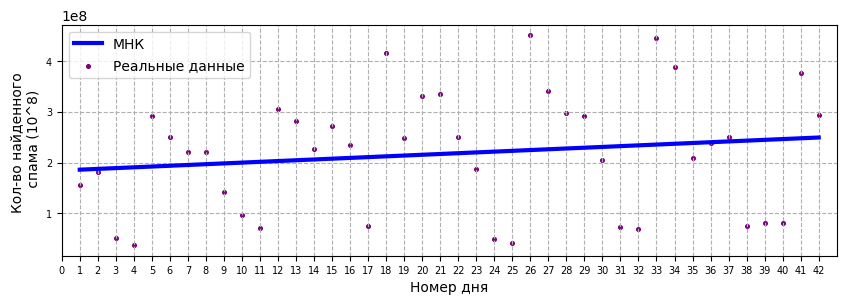

1544499.7163925127 184684398.95470384


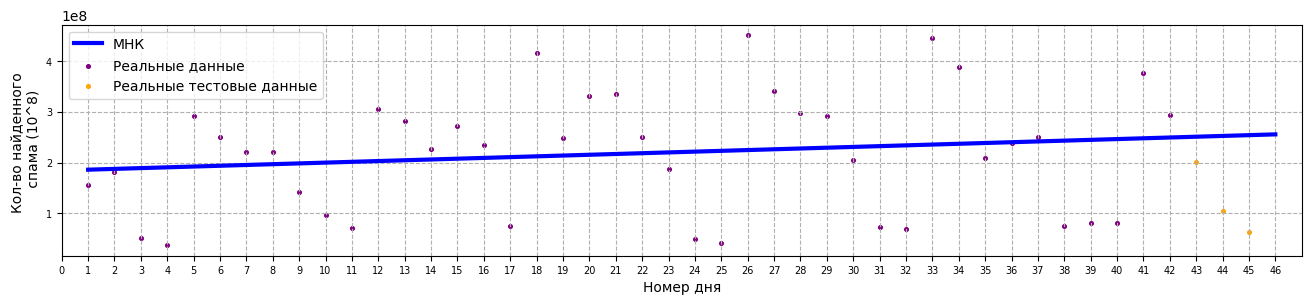

1544499.7163925127 184684398.95470384


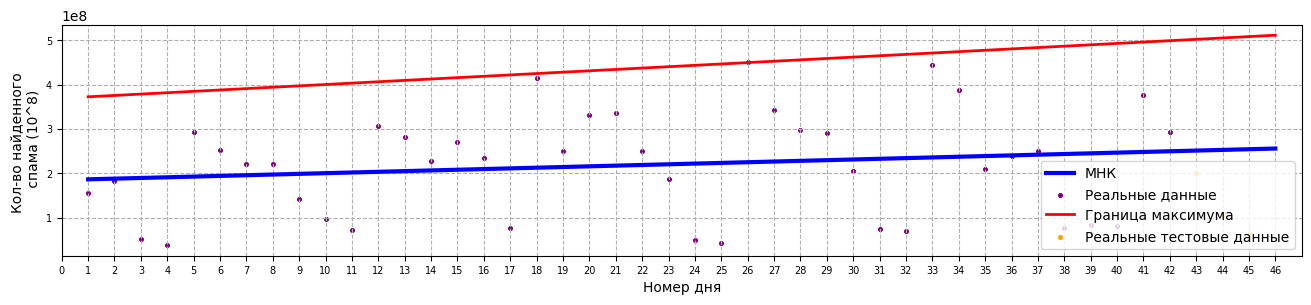

1385783.9021443673 187012230.89700997


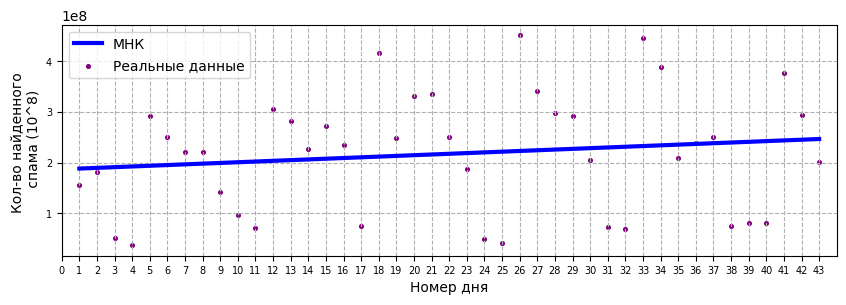

1385783.9021443673 187012230.89700997


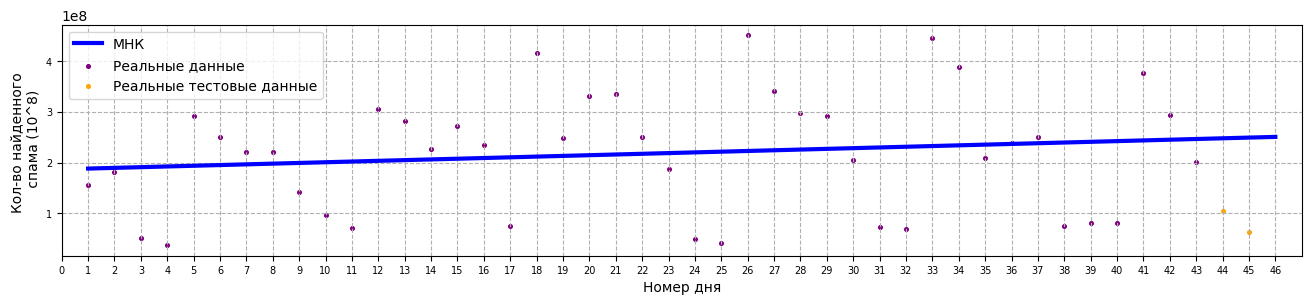

1385783.9021443673 187012230.89700997


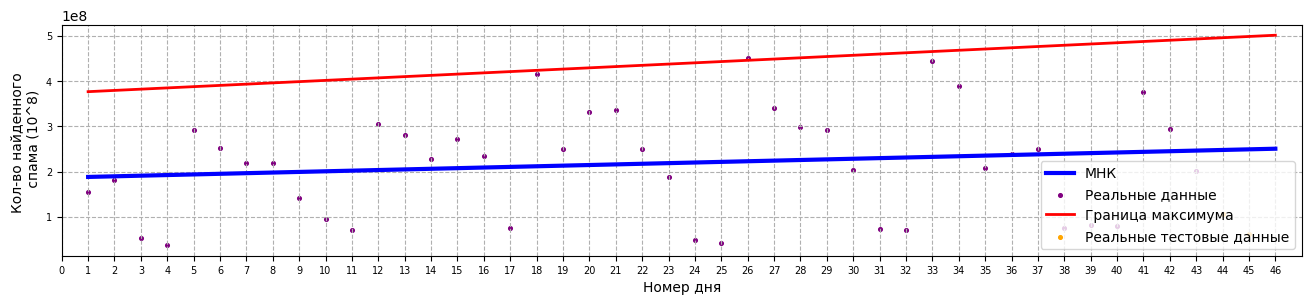

954339.2882311487 193483900.10570824


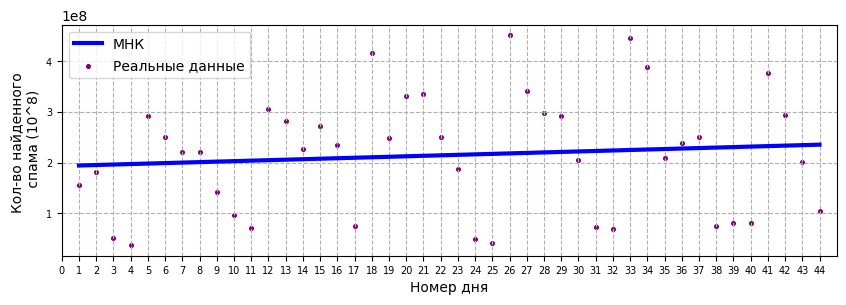

954339.2882311487 193483900.10570824


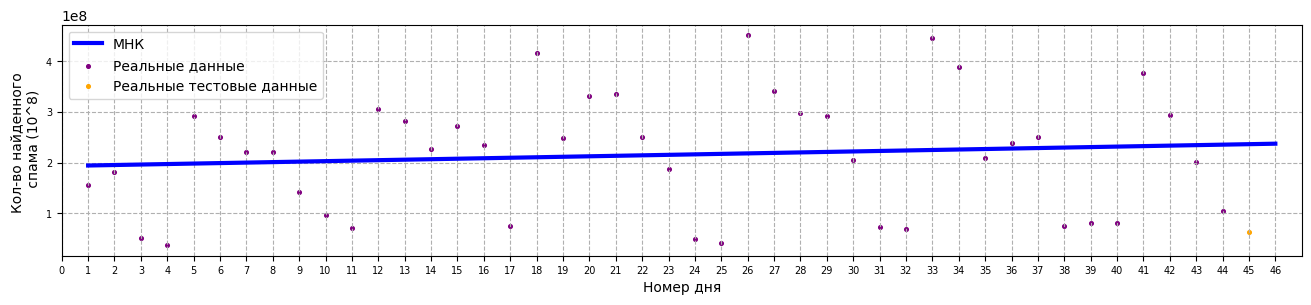

954339.2882311487 193483900.10570824


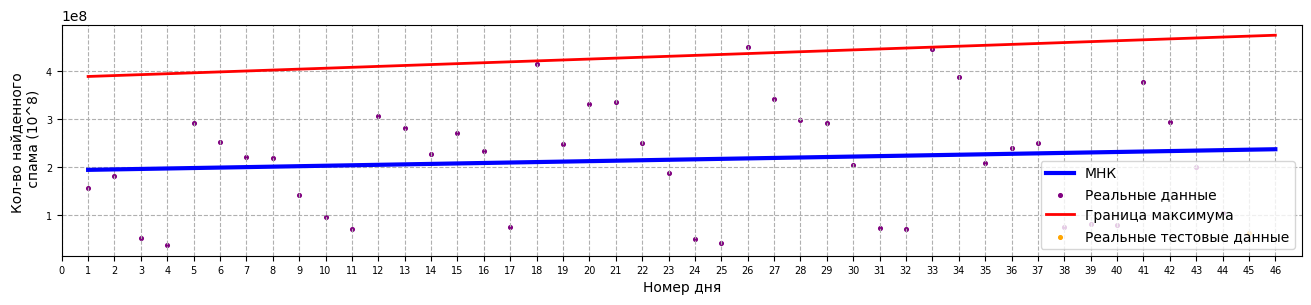

In [ ]:
for i in range(2,45):
    main(i)